In [16]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({'font.size': 14})

In [17]:
TROPOPAUSE_LIST = np.array([16.796782, 16.758917, 16.754074, 16.778471, 16.754147, 16.486168,
                            16.137138, 16.012793, 16.074669, 16.277315, 16.501312, 16.692408])

LABELS = {"z_bases": "Base altitude (km)",
          "z_tops": "Top altitude (km)",
          "z_max_capas": "Max. backscatter altitude (km)",
          "thickness": "Thickness (km)",
          "lidar_ratio": "Lidar ratio (sr)",
          "cod": "Cloud optical depth",
          "month": "Month",
          "hour": "Local time (h)",
          "year": "Year",
          "percentil_25": r"$25^{th}$ percentile",
          "percentil_75": r"$75^{th}$ percentile",
          "tropopause_base": "Distance from tropopause to base (km)",
          "tropopause_top": "Distance from tropopause to top (km)",
          "temperature_base": "Base temperature (°C)"}

DIR_SAVE = "figs_en"

LABELS_PERIOD = ['Annual', 'Wet season', 'Trans', 'Dry season']

LABELS_CAT = ['Opaque', 'Thin', 'SVC']

LABELS_PERIOD_2 = ['Wet season', 'Dry season']

MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

PERIOD_DIC = {'Wet': 'Wet season', 'Dry': 'Dry season'}

DIC_PERIOD = {1: 'Wet', 2: 'Wet', 3: 'Wet', 4: 'Wet', 5: 'Trans', 6: 'Dry', 7: 'Dry', 8: 'Dry', 9: 'Dry', 10: 'Trans', 11: 'Trans', 12: 'Trans'}

INVALID_HOURS = [11, 12, 13]

os.makedirs(DIR_SAVE, exist_ok=True)

def cod_class(cod):
  if cod <= 0.03:
    return 'subvisual'
  if cod <= 0.3:
    return 'thin'
  if cod > 0.3:
    return 'opaque'
  return np.nan

In [19]:
def create_latex_table_first(total, wet, trans, dry):
    print("\\hline")
    print(" & Total & Wet & Transition & Dry \\\\")
    print("\\hline")

    rows = [
        "No. prof. measured",
        "No. prof. analyzed",
        "No. prof. discarded, low SNR",
        "No. prof. discarded, apparent top",
        "No. prof. with cirrus",
        "Frequency of occurrence (\\%)",
        "Frequency of opaque profiles (\\%)",
        "Frequency of thin profiles (\\%)",
        "Frequency of SVC profiles (\\%)",
        "Column-integrated COD",
        "No. of cirrus layers per cloud prof."
    ]

    for i in range(len(rows)):
        print(f"{rows[i]} & {total[i]} & {wet[i]} & {trans[i]} & {dry[i]} \\\\")
    print("\\hline")


def data_year(ax_, order):
    df1 = (
        df
        .drop_duplicates('time')
        .groupby(['year', 'month'])['time']
        .count()
        .reset_index()
        .assign(year_month=lambda x: x.year + (x.month - 1) / 12)
    )

    df2 = (
        df
        [df.cond_s_bg]
        .drop_duplicates('time')
        .groupby(['year', 'month'])['time']
        .count()
        .reset_index()
        .assign(year_month=lambda x: x.year + (x.month - 1) / 12)
    )

    ax_.grid()
    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)

    ax_.bar(df1['year_month'], df1['time'], width=1/20, color="#d62728", alpha=0.7,
            label='Total')
    ax_.bar(df2['year_month'], df2['time'], width=1/20, color="#1f77b4", alpha=0.7,
            label='Good SNR')
    ax_.legend()

    ax_.set_title('Time series')

    ax_.set_yscale('log')

    if order is not None:
        ax_.text(.5, 0.92, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')


def data_month(ax_, order):
    df1 = (
        df
        .drop_duplicates('time')
        .groupby(['month'])['time']
        .count()
        .reset_index()
    )

    df2 = (
        df
        [df.cond_s_bg]
        .drop_duplicates('time')
        .groupby(['month'])['time']
        .count()
        .reset_index()
    )

    print(df2)

    ax_.grid()
    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)

    ax_.bar(MONTHS, df1['time'], width=1/1.5, color="#d62728", alpha=0.7)
    ax_.bar(MONTHS, df2['time'], width=1/1.5, color="#1f77b4", alpha=0.7)

    ax_.set_ylabel('Number of 5-min profiles')

    ax_.set_title('Climatology')

    ax_.set_yscale('log')

    if order is not None:
        ax_.text(.5, 0.92, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')


def data_hour(ax_, order):
    df1 = (
        df
        .drop_duplicates('time')
        .groupby(['hour'])['time']
        .count()
        .reset_index()
    )

    df2 = (
        df
        [df.cond_s_bg]
        .drop_duplicates('time')
        .groupby(['hour'])['time']
        .count()
        .reset_index()
    )

    print(df2)

    ax_.grid()
    ax_.set_xlabel('Local time (h)')
    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)

    ax_.bar(df1['hour'], df1['time'], width=1/2, color="#d62728", alpha=0.7)
    ax_.bar(df2['hour'], df2['time'], width=1/2, color="#1f77b4", alpha=0.7)

    ax_.set_title('Diurnal cycle')

    ax_.set_yscale('log')

    if order is not None:
        ax_.text(.5, 0.92, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')


cod<0.005: 8.0 %

    month   time
0       1   1300
1       2   3400
2       3   2366
3       4   5472
4       5   4135
5       6   6044
6       7   7507
7       8  10473
8       9   8307
9      10   8378
10     11   6013
11     12   3292
    hour  time
0      0  4966
1      1  4761
2      2  4675
3      3  4271
4      4  4186
5      5  4049
6      6  2233
7      7   994
8      8   828
9      9   665
10    10   495
11    11    17
12    13     3
13    14   265
14    15   666
15    16  1095
16    17  1791
17    18  4807
18    19  5158
19    20  5147
20    21  5302
21    22  5310
22    23  5003


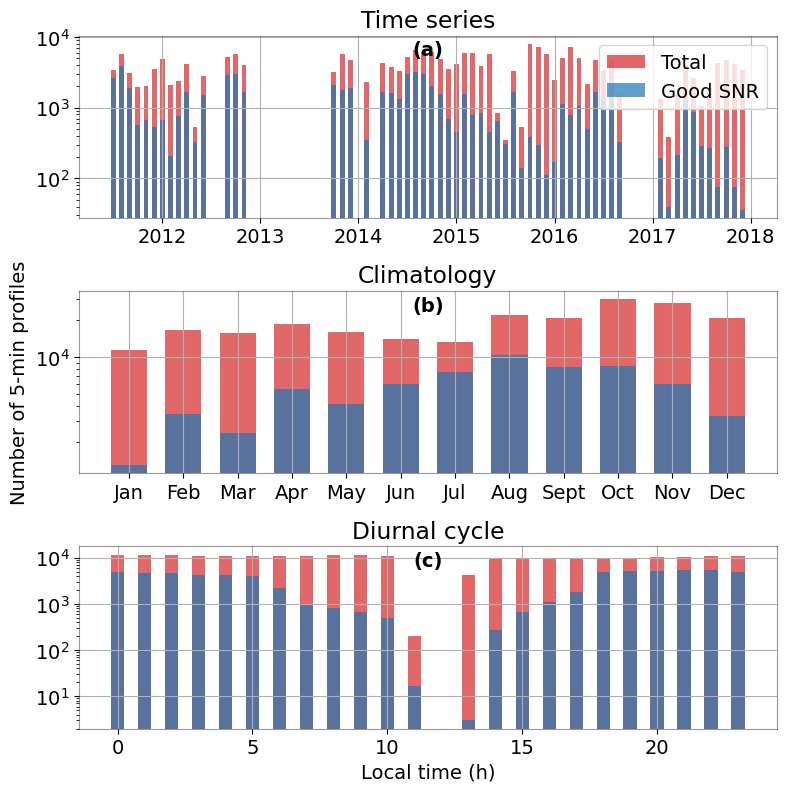

\hline
 & Total & Wet & Transition & Dry \\
\hline
No. prof. measured & 220400 & 60730 & 91758 & 67912 \\
No. prof. analyzed & 65774 & 12353 & 21487 & 31934 \\
No. prof. discarded, low SNR & 154023 & 48214 & 69974 & 35835 \\
No. prof. discarded, apparent top & 603 & 163 & 297 & 143 \\
No. prof. with cirrus & 47850 & 10561 & 18410 & 18879 \\
Frequency of occurrence (\%) & 73.1 & 81.8 & 80.8 & 56.7 \\
Frequency of opaque profiles (\%) &  22.6 &  29.4 &  26.4 &  13.6 \\
Frequency of thin profiles (\%) &  34.1 &  38.2 &  39.8 &  24.9 \\
Frequency of SVC profiles (\%) &  16.5 &  14.2 &  14.7 &  18.2 \\
Column-integrated COD &  0.37 ( 0.49) & 0.39 (0.39) & 0.39 (0.39) & 0.35 (0.35) \\
No. of cirrus layers per cloud prof. & 1.4 (0.61) & 1.51 (0.68) & 1.47 (0.63) & 1.28 (0.51) \\
\hline


In [20]:
# Gerar um csv por ano
part_files = ["df_cirrus_part1.csv", "df_cirrus_part2.csv", "df_cirrus_part3_new.csv"]
df = pd.concat([pd.read_csv(f) for f in part_files], ignore_index=True)

dummy = df[df.cirrus & (~df.fake_top1) & (df.cond_s_bg) & (~df.cod.isna())]

print('cod<0.005:', np.round((len(dummy[dummy.cod <= 0.005]) / len(dummy) * 100), 1), '%')
print()

df['cond_cirrus'] = df.cirrus & (df.cod >= 0.005)

df = df[(df.cirrus & (df.cod >= 0.005)) | df.cod.isna()]

fig, ax = plt.subplots(nrows = 3, figsize=(9,9))
fig.subplots_adjust(hspace=0.4)
data_year(ax[0], '(a)')
data_month(ax[1], '(b)')
data_hour(ax[2],  '(c)')
plt.savefig(f"{DIR_SAVE}/data", dpi=300)
plt.show()

df = df.assign(time=lambda x: pd.to_datetime(x.time)).assign(hour=lambda x: np.floor(x.time.dt.hour + (x.time.dt.minute / 60) + 0.5) % 24)

df = df[~df.hour.isin(INVALID_HOURS)]

df_original = df.copy()

total = []
wet = []
trans = []
dry = []

df_profiles = (df
               .sort_values('z_tops')
               .drop_duplicates('time', keep='last'))

total.append(len(df_profiles))
wet.append(len(df_profiles[df_profiles.period == "Wet"]))
trans.append(len(df_profiles[df_profiles.period == "Trans"]))
dry.append(len(df_profiles[df_profiles.period == "Dry"]))

total.append(len(df_profiles[(~df_profiles.fake_top1) & df_profiles.cond_s_bg]))
wet.append(len(df_profiles[(df_profiles.period == "Wet") & (~df_profiles.fake_top1) & df_profiles.cond_s_bg]))
trans.append(len(df_profiles[(df_profiles.period == "Trans") & (~df_profiles.fake_top1) & df_profiles.cond_s_bg]))
dry.append(len(df_profiles[(df_profiles.period == "Dry") & (~df_profiles.fake_top1) & df_profiles.cond_s_bg]))

total.append(len(df_profiles[(~df_profiles.cond_s_bg)]))
wet.append(len(df_profiles[(df_profiles.period == "Wet") & (~df_profiles.cond_s_bg)]))
trans.append(len(df_profiles[(df_profiles.period == "Trans") & (~df_profiles.cond_s_bg)]))
dry.append(len(df_profiles[(df_profiles.period == "Dry") & (~df_profiles.cond_s_bg)]))

total.append(df_profiles[df_profiles.cond_s_bg].fake_top1.sum())
wet.append(df_profiles[(df_profiles.period == "Wet") & (df_profiles.cond_s_bg)].fake_top1.sum())
trans.append(df_profiles[(df_profiles.period == "Trans") & (df_profiles.cond_s_bg)].fake_top1.sum())
dry.append(df_profiles[(df_profiles.period == "Dry") & (df_profiles.cond_s_bg)].fake_top1.sum())

df = df[df.cond_s_bg & (~df.fake_top1)]

total.append(len(df[df.cirrus].drop_duplicates('time')))
wet.append(len(df[df.cirrus & (df.period == "Wet")].drop_duplicates('time')))
trans.append(len(df[df.cirrus & (df.period == "Trans")].drop_duplicates('time')))
dry.append(len(df[df.cirrus & (df.period == "Dry")].drop_duplicates('time')))

freq = (df
        .sort_values("z_tops").drop_duplicates("time", keep="last")
        .groupby(["period", "month", "hour"])["cirrus"].mean().reset_index()
        .groupby(["period", "month"])["cirrus"].mean().reset_index()
        .groupby(["period"])["cirrus"].mean()
        * 100)

total.append(f"{freq.mean().round(1)}")
wet.append(f"{freq.loc['Wet'].round(1)}")
trans.append(f"{freq.loc['Trans'].round(1)}")
dry.append(f"{freq.loc['Dry'].round(1)}")

for i, class_ in enumerate(["opaque", "thin", "subvisual"]):
  cod_total = (df[df.cirrus]
               .groupby('time').cod.sum()
               .reset_index()
               .assign(class_=lambda x: x.cod.map(cod_class))
               .assign(time=lambda x: pd.to_datetime(x.time))
               .assign(month=lambda x: x.time.dt.month)
               .assign(hour=lambda x: x.time.dt.hour)
               .assign(period=lambda x: x.month.map(DIC_PERIOD))
               )
  freq = (cod_total
          .assign(cat=lambda x: x.class_ == class_)
          .groupby(["period", "month","hour"])["cat"].mean().reset_index()
          .groupby(["period", "month"])["cat"].mean().reset_index()
          .groupby(["period"])["cat"].mean())


  total.append(f"{freq.mean() * float(total[-i - 1]): .1f}")
  wet.append(f"{freq.loc['Wet'] * float(wet[-i - 1]): .1f}")
  trans.append(f"{freq.loc['Trans'] * float(trans[-i - 1]): .1f}")
  dry.append(f"{freq.loc['Dry'] * float(dry[-i - 1]): .1f}")


cod_total = df[df.cirrus].groupby('time').cod.sum()
total.append(f"{cod_total.mean(): .2f} ({cod_total.std(ddof=1): .2f})")

cod_period = df[df.cirrus].groupby(['period', 'time']).cod.sum()

wet.append(f"{cod_period.loc['Wet'].mean():.2f} ({cod_period.loc['Wet'].mean():.2f})")
trans.append(f"{cod_period.loc['Trans'].mean():.2f} ({cod_period.loc['Trans'].mean():.2f})")
dry.append(f"{cod_period.loc['Dry'].mean():.2f} ({cod_period.loc['Dry'].mean():.2f})")


layer_total = (df
         [df.cirrus & (df.cod >= 0.005)]
         .assign(N_layers=lambda x: x.time.map(x.groupby('time').size()))
         .drop_duplicates('time')
         .N_layers
         .agg(['mean', 'std']).round(2))

total.append(f"{layer_total.loc['mean']} ({layer_total.loc['std']})")

layer_period = (df
         [df.cirrus & (df.cod >= 0.005)]
         .assign(N_layers=lambda x: x.time.map(x.groupby('time').size()))
         .drop_duplicates('time')
         .groupby(["period"])["N_layers"].agg(['mean', 'std']).round(2))

# Com desvio padrão
wet.append(f"{layer_period.loc['Wet', 'mean']} ({layer_period.loc['Wet', 'std']})")
trans.append(f"{layer_period.loc['Trans', 'mean']} ({layer_period.loc['Trans', 'std']})")
dry.append(f"{layer_period.loc['Dry', 'mean']} ({layer_period.loc['Dry', 'std']})")


create_latex_table_first(total, wet, trans, dry)

# Frequency of occurence

## Diurnal cycle

In [21]:
def ciclo_diurno_freq(ax_, order=None):
    dfs =[pd.read_csv(file, sep=";") for file in ["gouveia_freq_wet.csv",
                                                         "gouveia_freq_trans.csv",
                                                         "gouveia_freq_dry.csv",
                                                         "gouveia_freq_total.csv"]]

    df_freq = df.sort_values("z_tops").drop_duplicates("time", keep="last")

    width = 1/3

    mensal_period = df_freq.groupby(["period", "hour"])["cirrus"].mean()
    count_period = (df_freq.groupby(["period", "hour"])["cirrus"].count())
    error_period = np.sqrt(mensal_period * (1 - mensal_period) / count_period)

    mensal_total = df_freq.groupby(["hour"])["cirrus"].mean()
    count_total = df_freq.groupby("hour")["cirrus"].count()
    error_total = np.sqrt(mensal_total * (1 - mensal_total) / count_total)

    mensal_total = pd.concat([mensal_total,
                            pd.Series({12:np.nan, 13:np.nan})]).sort_index()

    periods = []
    hours = []
    cirrus = []
    for hour in [11, 12, 13]:
        for period in mensal_period.reset_index().period.unique():
            periods.append(period)
            hours.append(hour)
            cirrus.append(np.nan)

    dict_ = {'period': periods,
             'hour': hours,
             'cirrus': cirrus}

    count_period = count_period.reset_index()
    mensal_period = mensal_period.reset_index()
    error_period = error_period.reset_index()

    mensal_total.loc[11:13] = np.nan
    mensal_period.loc[(mensal_period.period == 'Dry') & (mensal_period.hour == 11), 'cirrus'] = np.nan
    mensal_period.loc[(mensal_period.period == 'Wet') & (mensal_period.hour == 11), 'cirrus'] = np.nan

    mensal_period = pd.concat([mensal_period, pd.DataFrame(dict_)]).sort_values(by=["period", "hour"]).reset_index(drop=True)
    error_period = pd.concat([error_period, pd.DataFrame(dict_)]).sort_values(by=["period", "hour"]).reset_index(drop=True)


    for i, (df_, c) in enumerate(zip(dfs, ["#1f77b4", "g", "#d62728", "k"])):
        if i == 1:
            continue
        ax_.plot(df_["hour"], df_[" freq"], "--", color=c, alpha=0.7)

    barras = []
    for period, c in zip(["Wet", "Dry"], ["#1f77b4", "#d62728"]):
        count_temp = count_period[count_period.period == period]
        mensal_temp = mensal_period[mensal_period.period == period]
        error_temp = error_period[error_period.period == period]


        ax_.plot(mensal_temp.hour, mensal_temp.cirrus, color=c, linewidth=2.5, alpha=0.7, label=PERIOD_DIC[period])
        ax_.fill_between(mensal_temp.hour, mensal_temp.cirrus - error_temp.cirrus, mensal_temp.cirrus + error_temp.cirrus, color=c, alpha=0.2)

    ax_.plot(mensal_total.index, mensal_total, color="k", linewidth=2.5, alpha=0.7, label="Anual")
    ax_.fill_between(mensal_total.index, mensal_total - error_total, mensal_total + error_total, color="k", alpha=0.3)

    df_freq = df.sort_values("z_tops").drop_duplicates("time", keep="last")

    width = 1/3

    mensal_period = df_freq.groupby(["period", "hour"])["cirrus"].mean()
    count_period = (df_freq.groupby(["period", "hour"])["cirrus"].count())
    error_period = np.sqrt(mensal_period * (1 - mensal_period) / count_period)

    mensal_total = df_freq.groupby(["hour"])["cirrus"].mean()
    count_total = df_freq.groupby("hour")["cirrus"].count()
    error_total = np.sqrt(mensal_total * (1 - mensal_total) / count_total)

    periods = []
    hours = []
    cirrus = []
    for hour in [12, 13]:
        for period in mensal_period.reset_index().period.unique():
            periods.append(period)
            hours.append(hour)
            cirrus.append(np.nan)

    dict_ = {'period': periods,
             'hour': hours,
             'cirrus': cirrus}

    count_period = count_period.reset_index()
    mensal_period = mensal_period.reset_index()
    error_period = error_period.reset_index()

    ax_.grid()

    line1, = ax_.plot([], [], color='k', linestyle='--', label='Gouveia et al. (2017)')
    line3, = ax_.plot([], [],  color='k', linestyle='-', label='This work')

    legend1 = ax_.legend(handles=[line1, line3], loc='lower right', title='Line', fontsize=12)
    ax_.add_artist(legend1)

    import matplotlib.patches as mpatches

# Criar os patches
    patch1 = mpatches.Patch(color="#1f77b4", alpha=0.7, label='Wet season')
    patch2 = mpatches.Patch(color="k", alpha=0.7, label='Annual')
    patch3 = mpatches.Patch(color="#d62728", alpha=0.7, label='Dry season')

    # Adicionar os patches à legenda
    legend2 = ax_.legend(handles=[patch1, patch2, patch3], loc='lower left', title='Colour', fontsize=12)

    ax_.add_artist(legend2)

    ax_.set_ylabel("Frequency of occurrence", fontsize=17)

    ax_.set_ylim([0, 1])
    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)

    if order is not None:
        ax_.text(.5, 1.05, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')


def ciclo_diurno_freq_cat(ax_, period=None, order=None):
    df_ = (df
           .assign(subvisual=lambda x: x.class_ == "subvisual")
           .assign(thin=lambda x: x.class_ == "thin")
           .assign(opaque=lambda x: x.class_ == "opaque"))


    if period is not None:
        df_ = df_[df_.period == period]

    data_svc = df_.groupby('hour')['subvisual'].mean()
    data_thin = df_.groupby('hour')['thin'].mean()
    data_opaque = df_.groupby('hour')['opaque'].mean()

    data_svc_std = np.sqrt(data_svc * (1 - data_svc) / df_.groupby('hour')['subvisual'].count())
    data_thin_std = np.sqrt(data_thin * (1 - data_thin) / df_.groupby('hour')['thin'].count())
    data_opaque_std = np.sqrt(data_opaque * (1 - data_opaque) / df_.groupby('hour')['opaque'].count())

    data_svc = pd.concat([data_svc,
                            pd.Series({12:np.nan, 13:np.nan})]).sort_index()
    data_thin = pd.concat([data_thin,
                              pd.Series({12:np.nan, 13:np.nan})]).sort_index()
    data_opaque = pd.concat([data_opaque,
                           pd.Series({12:np.nan, 13:np.nan})]).sort_index()

    colors = ['#800080', '#FFA500', '#00FFFF']

    for i, (data, data_std) in enumerate(zip([data_opaque, data_thin, data_svc],
                                             [data_opaque_std, data_thin_std, data_svc_std])):
        ax_.plot(data.index, data.sort_index(), linewidth=2.5, alpha=0.6, color=colors[i], label=LABELS_CAT[i])
        ax_.fill_between(data.index, data - data_std, data + data_std, color=colors[i], alpha=0.2)

    ax_.set_ylabel("Frequency of occurrence", fontsize=17)
    ax_.grid()
    ax_.legend()
    ax_.set_ylim([0, 0.55])
    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)

    if order is not None:
        ax_.text(.5, 1.05, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')



def precip(ax_, order=None):
    df_precip = pd.read_csv('precip_2011_2017_cmorph.csv')

    df_precip = (df_precip
                          .assign(time=lambda x: pd.to_datetime(x.time))
                          .assign(hour=lambda x: np.round(x.time.dt.hour + x.time.dt.minute / 60)))

    df_precip.loc[df_precip.hour == 24, "hour"] = 0

    wet_mean = df_precip[df_precip.month.isin([1,2,3,4])].groupby('hour')['cmorph_mean'].mean()
    wet_std = (df_precip[df_precip.month.isin([1,2,3,4])]
                   .groupby(['year', 'hour'])['cmorph_mean'].mean().reset_index()
                   .groupby(['hour'])['cmorph_mean'].std(ddof=1))

    dry_mean = df_precip[df_precip.month.isin([6,7,8,9])].groupby('hour')['cmorph_mean'].mean()
    dry_std = (df_precip[df_precip.month.isin([6,7,8,9])]
                .groupby(['year', 'hour'])['cmorph_mean'].mean().reset_index()
                   .groupby(['hour'])['cmorph_mean'].std(ddof=1))

    annual_mean = df_precip.groupby('hour')['cmorph_mean'].mean()
    annal_std = (df_precip
                 .groupby(['year', 'hour'])['cmorph_mean'].mean().reset_index()
                 .groupby(['hour'])['cmorph_mean'].std(ddof=1))

    ax_.plot(wet_mean.index, wet_mean, linewidth=2.5, alpha=.7, color='#1f77b4', label='Wet season')
    ax_.fill_between(wet_mean.index, wet_mean - wet_std, wet_mean + wet_std, color='#1f77b4', alpha=0.2)

    ax_.plot(dry_mean.index, dry_mean, linewidth=2.5, alpha=.7, color='#d62728', label='Dry season')
    ax_.fill_between(dry_mean.index, dry_mean - dry_std, dry_mean + dry_std, color='#d62728', alpha=0.2)

    ax_.set_xlabel('Local time (h)', fontsize=17)
    ax_.set_ylabel('Precipitation rate (mm/h)', fontsize=17)
    ax_.legend()
    ax_.grid()

    for side in ['right', 'top', 'bottom', 'left']:
            ax_.spines[side].set_alpha(0.4)

    if order is not None:
        ax_.text(.5, 1.05, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')


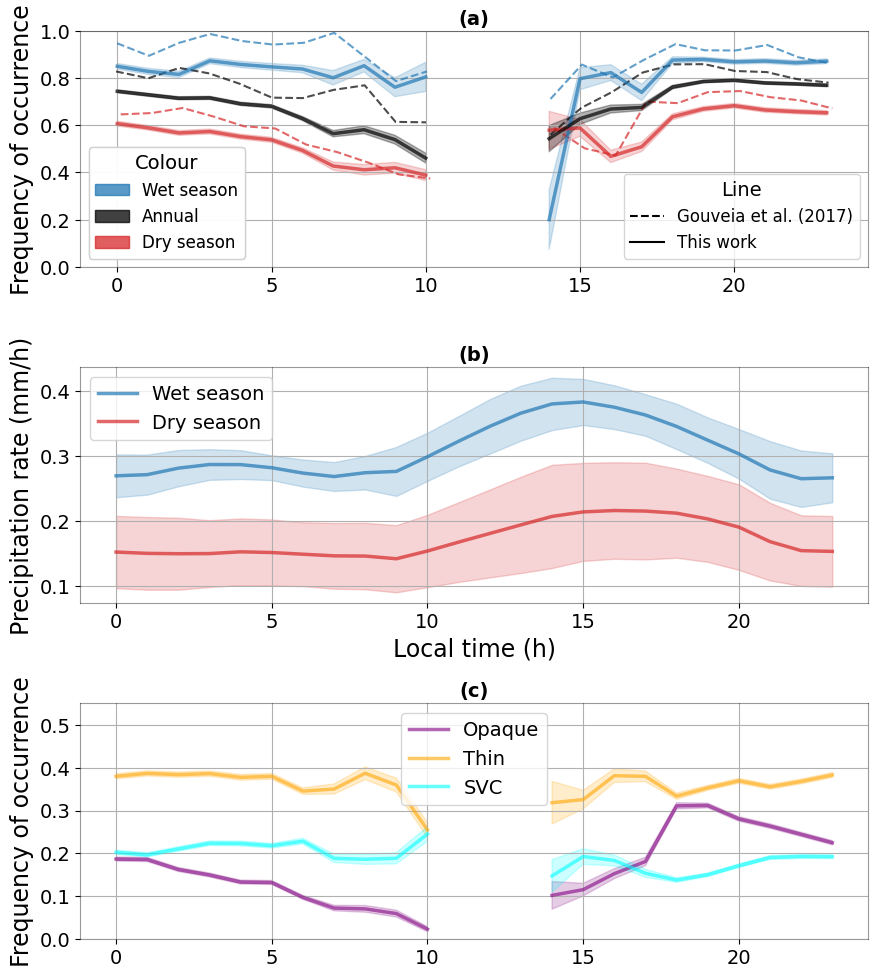

In [22]:
fig, ax = plt.subplots(figsize=(9, 10), nrows=3)

ciclo_diurno_freq(ax[0], '(a)')
precip(ax[1], '(b)')
ciclo_diurno_freq_cat(ax[2], order='(c)')

fig.tight_layout()
plt.savefig(f"{DIR_SAVE}/ciclo_freq_ocorrencia", dpi=300)
plt.show()

## Ciclo Anual

In [23]:
def ciclo_anual(ax_, order=None, cax_=None):
    df_freq = df[(~df.hour.isin(INVALID_HOURS))].sort_values("z_tops").drop_duplicates("time", keep="last")

    df_precip_mensal = (pd.read_csv("precip_2011_2017_cmorph_daily.csv")
                        .assign(year=lambda x: pd.to_datetime(x.time).dt.year)
                        .assign(month=lambda x: pd.to_datetime(x.time).dt.month)
                        .groupby(['year', 'month'])['precip'].mean().reset_index()
                        .groupby(['month'])['precip'].agg(['mean', 'std', 'count'])
                        .assign(std_mean=lambda x: x['std'] / np.sqrt(x['count'])))

    df_mensal = df_freq.merge(df_precip_mensal, on='month', how='left')

    contagens = df_freq.groupby("month").count().cirrus

    mensal = (df_freq
     .groupby(["month", "hour"])["cirrus"].mean().reset_index()
     .groupby(["month"]).mean().cirrus)

    error = (df_freq
             .groupby(["month", "hour"])["cirrus"].mean().reset_index()
             .groupby(["month"]).std(ddof=1).cirrus)

    ax_.fill_between(MONTHS, 0, 1, where=contagens.index.isin([6,7,8,9]), color='#d62728', alpha=0.1, label=LABELS_PERIOD_2[1])
    ax_.fill_between(MONTHS, 0, 1, where=contagens.index.isin([1,2,3,4]), color='#1f77b4', alpha=0.1, label=LABELS_PERIOD_2[0])
    ax_.plot(MONTHS, mensal, color="#1f77b4", linewidth=2.5, alpha=0.6)
    ax_.fill_between(MONTHS, mensal - error, mensal + error, alpha=0.3)
    ax_.legend()
    ax_.grid(0.5)
    ax_.set_ylim([0, 1])


    ax2 = ax_.twinx()
    ax2.plot(MONTHS, df_precip_mensal["mean"], 'g-', linewidth=1.5, alpha=0.6)
    ax2.fill_between(MONTHS, df_precip_mensal["mean"] - df_precip_mensal["std_mean"],
                     df_precip_mensal["mean"] + df_precip_mensal["std_mean"], color="g", alpha=0.3)
    ax2.set_ylim([2.5, 18])

    ax_.set_ylabel("Frequency of \noccurence", color="#1f77b4")
    ax2.set_ylabel('Precipitation rate (mm/day)', color='g')

    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)
        ax2.spines[side].set_alpha(0)

    if order is not None:
        ax_.text(.5, 1.05, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')

    if cax_ is not None:
        cax_.axis('off')
        divider1 = make_axes_locatable(ax2)
        cax_ = divider1.append_axes("right", size="5%", pad=0.1)
        cax_.axis('off')


def ciclo_anual_cat(ax_, order=None, cax_=None):
    df_ = (df
           [(~df.hour.isin(INVALID_HOURS))]
           .assign(subvisual=lambda x: x.class_ == "subvisual")
           .assign(thin=lambda x: x.class_ == "thin")
           .assign(opaque=lambda x: x.class_ == "opaque"))


    data_svc = (df_
                .groupby(['month', 'hour'])['subvisual'])
    data_thin = (df_
                 .groupby(['month', 'hour'])['thin'])
    data_opaque = (df_
                  .groupby(['month', 'hour'])['opaque'])

    for months in [[1,2,3,4], [6,7,8,9]]:
        for data in [data_svc, data_thin, data_opaque]:
            data_temp = data.mean().reset_index()

    data_svc = data_svc.mean().reset_index().groupby(['month']).mean().subvisual
    data_thin = data_thin.mean().reset_index().groupby(['month']).mean().thin
    data_opaque = data_opaque.mean().reset_index().groupby(['month']).mean().opaque

    data_svc_std = (df_
                    .groupby(['month', 'hour'])['subvisual'].mean().reset_index()
                    .groupby('month')['subvisual'].std(ddof=1))
    data_thin_std = (df_
                     .groupby(['month', 'hour'])['thin'].mean().reset_index()
                     .groupby('month')['thin'].std(ddof=1))
    data_opaque_std = (df_
                      .groupby(['month', 'hour'])['opaque'].mean().reset_index()
                      .groupby('month')['opaque'].std(ddof=1))

    colors = ['#800080', '#FFA500', '#00FFFF']

    ax_.fill_between(MONTHS, 0, .65, where=data_opaque.sort_index().index.isin([6,7,8,9]), color='#d62728', alpha=0.1)
    ax_.fill_between(MONTHS, 0, .65, where=data_opaque.sort_index().index.isin([1,2,3,4]), color='#1f77b4', alpha=0.1)
    for i, (data, data_std) in enumerate(zip([data_opaque, data_thin, data_svc],
                                             [data_opaque_std, data_thin_std, data_svc_std])):
        ax_.errorbar(MONTHS, data.sort_index(), linewidth=2.5, alpha=0.6, color=colors[i], label=LABELS_CAT[i])
        ax_.fill_between(MONTHS, (data - data_std).sort_index(), (data + data_std).sort_index(),
                        color=colors[i], alpha=0.2)

    ax_.grid()
    ax_.legend()
    ax_.set_ylabel("Frequency of \noccurence")
    ax_.set_ylim([0, .65])
    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)

    if order is not None:
        ax_.text(.5, 1.05, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')

    if cax_ is not None:
        cax_.axis('off')


def prob(ax_, order=None, cax_=None):
    z = np.arange(6500, 19_000, 200)
    df_freq = df[(~df.hour.isin(INVALID_HOURS))].sort_values("z_tops").drop_duplicates("time", keep="last")

    bases = [df_freq[(df_freq.month == month) & df_freq.cirrus].z_bases.to_numpy() for month in np.arange(1, 13)]
    tops = [df_freq[(df_freq.month == month) & df_freq.cirrus].z_tops.to_numpy() for month in np.arange(1, 13)]

    matrix = []
    for month_base, month_top in zip(bases, tops):
        matrix.append(np.array([((z >= base) & (z <= top)) for base, top in zip(month_base, month_top)]).sum(axis=0))

    lengths = [array.sum() for array in matrix]
    matrix = pd.DataFrame(matrix)
    matrix.index = MONTHS
    matrix = matrix.rename(columns={i:val for i, val in enumerate(z)})

    factor = (df[(~df.hour.isin(INVALID_HOURS))].sort_values("z_tops").drop_duplicates("time", keep="last")
              .groupby(["month", "hour"])["cirrus"].mean().reset_index()
              .groupby(["month"]).mean().cirrus
              .to_numpy())

    new_matrix = matrix / np.array(lengths).reshape(-1, 1)
    z=new_matrix.T.to_numpy() * factor
    x=new_matrix.T.columns.to_numpy()
    y=new_matrix.T.index.to_numpy()

    cs = ax_.contourf(x, y / 1e3, z, cmap='viridis', levels=15)

    if cax_ is not None:
        cbar = fig.colorbar(cs, cax=cax_)
    else:
        cbar = fig.colorbar(cs)
    cbar.set_label("Frequency of \noccurence")


    ax_.plot(x, TROPOPAUSE_LIST, ':w', alpha=.8, linewidth=3.5)

    ax_.set_ylabel("Altitude (km)")

    if order is not None:
        ax_.text(.5, 1.05, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')


In [24]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# --- Constantes de mês ---
MONTHS = np.arange(1, 13)
MONTH_NAMES = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec",
]
# índices estendidos: -1 (dez antes de jan) e 13 (jan depois de dez)
MONTHS_EXT = np.concatenate(([-1], MONTHS, [13]))


# --- Helpers ---
def _hide_endpoints(series: pd.Series) -> pd.Series:
    """
    Agora NÃO oculta mais -1 nem 13.
    Assim a curva começa em dezembro e termina em janeiro de novo.
    """
    return series.copy()


def _extend_with_january(series: pd.Series | pd.DataFrame) -> pd.Series | pd.DataFrame:
    """
    Adiciona dezembro em -1 e janeiro em 13 para continuidade Dez→Jan.
    """
    x = series.copy()
    if isinstance(x, pd.DataFrame):
        x.loc[-1] = x.loc[12].to_dict()
        x.loc[13] = x.loc[1].to_dict()
    else:
        x.loc[-1] = x.loc[12]
        x.loc[13] = x.loc[1]
    return x.sort_index()


# ========== (a) Frequência total vs mês ==========
def ciclo_anual(ax_, order: str | None = None, cax_=None):
    df_freq = (
        df[(~df.hour.isin(INVALID_HOURS))]
        .sort_values("z_tops")
        .drop_duplicates("time", keep="last")
    )

    # precipitação mensal
    df_precip_mensal = (
        pd.read_csv("precip_2011_2017_cmorph_daily.csv")
        .assign(year=lambda x: pd.to_datetime(x.time).dt.year,
                month=lambda x: pd.to_datetime(x.time).dt.month,
                day=lambda x: pd.to_datetime(x.time).dt.day,
                hour=lambda x: pd.to_datetime(x.time).dt.hour)
        .groupby(["year", "month", "hour"])["precip"].mean().reset_index()
        .groupby(["year", "month"])["precip"].mean().reset_index()
        .groupby("month")["precip"].agg(["mean", "std", "count"])
    )
    df_precip_mensal = _extend_with_january(df_precip_mensal)

    mensal = (
        df_freq
        .groupby(["month", "hour"])["cirrus"].mean().reset_index()
        .groupby("month").mean().cirrus
    )
    mensal = _extend_with_january(mensal)

    count = (
        df_freq
        .groupby(["month", "hour"])["cirrus"].mean().reset_index()
        .groupby("month").count().cirrus
    )
    count = _extend_with_january(count)

    error = np.sqrt(mensal * (1 - mensal) / count)

    # Sombras de estação
    ax_.axvspan(6, 10, facecolor="#d62728", alpha=0.1, label=LABELS_PERIOD_2[1], zorder=0.1)  # seca: Jun–Sep
    ax_.axvspan(0.5, 5, facecolor="#1f77b4", alpha=0.1, label=LABELS_PERIOD_2[0], zorder=0.1)  # chuvosa: Jan–Apr

    # Curva centralizada (~dia 15)
    X_SHIFT = MONTHS_EXT + 0.5
    mensal_plot, error_plot = map(_hide_endpoints, [mensal, error])

    ax_.plot(X_SHIFT, mensal_plot, color="#1f77b4", lw=2.5, alpha=0.6)
    ax_.fill_between(X_SHIFT, mensal_plot - error_plot, mensal_plot + error_plot, alpha=0.3)

    # Eixo X: só Jan..Dec, mas curva começa em dez (-0.5)
    ax_.set_xlim([0, 13])
    ax_.set_xticks(np.arange(1, 13))
    ax_.set_xticklabels(MONTH_NAMES)

    ax_.set_ylim([0, 1])
    ax_.set_ylabel("Frequency of \noccurence", color="#1f77b4")
    ax_.grid(0.5)
    ax_.legend()

    # Eixo secundário precipitação
    ax2 = ax_.twinx()
    precip_plot = _hide_endpoints(df_precip_mensal["mean"])
    precip_err  = _hide_endpoints(df_precip_mensal["std"] / np.sqrt(df_precip_mensal["count"]))

    ax2.plot(X_SHIFT, precip_plot, "g-", lw=1.5, alpha=0.6)
    ax2.fill_between(X_SHIFT, precip_plot - precip_err, precip_plot + precip_err, color="g", alpha=0.3)
    ax2.set_ylim([2.5, 18])
    ax2.set_ylabel("Precipitation rate (mm/day)", color="g")

    for side in ["right", "top", "bottom", "left"]:
        ax_.spines[side].set_alpha(0.4)
        ax2.spines[side].set_alpha(0)

    if order:
        ax_.text(0.5, 1.05, order, transform=ax_.transAxes, ha="center", va="center", weight="bold")

    if cax_ is not None:
        cax_.axis("off")
        divider = make_axes_locatable(ax2)
        divider.append_axes("right", size="5%", pad=0.1).axis("off")


# ========== (b) Frequência por categoria ==========
def ciclo_anual_cat(ax_, order: str | None = None, cax_=None):
    df_ = (
        df[(~df.hour.isin(INVALID_HOURS))]
        .assign(subvisual=lambda x: x.class_ == "subvisual",
                thin=lambda x: x.class_ == "thin",
                opaque=lambda x: x.class_ == "opaque")
    )

    def _agg(cat):
        out = (df_
               .sort_values(["time", cat])
               .drop_duplicates("time", keep="last")
               .groupby(["month", "hour"])[cat].mean().reset_index()
               .groupby("month")[cat].agg(["mean", "std", "count"]))
        out = _extend_with_january(out)
        mean = out["mean"]
        stdp = np.sqrt(mean * (1 - mean) / out["count"])
        return mean, stdp

    data_opaque, data_opaque_std = _agg("opaque")
    data_thin,   data_thin_std   = _agg("thin")
    data_svc,    data_svc_std    = _agg("subvisual")

    # Sombras de estação
    ax_.axvspan(6, 10, facecolor="#d62728", alpha=0.1, label=LABELS_PERIOD_2[1], zorder=0.1)  # seca: Jun–Sep
    ax_.axvspan(0.5, 5, facecolor="#1f77b4", alpha=0.1, label=LABELS_PERIOD_2[0], zorder=0.1)  # chuvosa: Jan–Apr

    # Curvas centralizadas
    X_SHIFT = MONTHS_EXT + 0.5
    colors = ["#800080", "#FFA500", "#00FFFF"]
    for data, std, color, label in zip(
        map(_hide_endpoints, [data_opaque, data_thin, data_svc]),
        map(_hide_endpoints, [data_opaque_std, data_thin_std, data_svc_std]),
        colors, LABELS_CAT
    ):
        ax_.errorbar(X_SHIFT, data, lw=2.5, alpha=0.6, color=color, label=label)
        ax_.fill_between(X_SHIFT, data - std, data + std, color=color, alpha=0.2)

    ax_.set_xlim([0, 13])
    ax_.set_xticks(np.arange(1, 13))
    ax_.set_xticklabels(MONTH_NAMES)

    ax_.set_ylim([0, .65])
    ax_.set_ylabel("Frequency of \noccurence")
    ax_.grid()
    ax_.legend()

    for side in ["right", "top", "bottom", "left"]:
        ax_.spines[side].set_alpha(0.4)

    if order:
        ax_.text(0.5, 1.05, order, transform=ax_.transAxes, ha="center", va="center", weight="bold")

    if cax_ is not None:
        cax_.axis("off")


# ========== (c) Probabilidade vertical + tropopausa ==========
def prob(ax_, order: str | None = None, cax_=None):
    z = np.arange(6500, 19_000, 200)
    df_freq = (
        df[(~df.hour.isin(INVALID_HOURS))]
        .sort_values("z_tops")
        .drop_duplicates("time", keep="last")
    )

    bases = [df_freq[(df_freq.month == m) & df_freq.cirrus].z_bases.to_numpy() for m in MONTHS]
    tops  = [df_freq[(df_freq.month == m) & df_freq.cirrus].z_tops.to_numpy()  for m in MONTHS]

    matrix = [((z[:, None] >= b) & (z[:, None] <= t)).sum(axis=1) for b, t in zip(bases, tops)]
    lengths = np.array([m.sum() for m in matrix])

    df_mat = pd.DataFrame(matrix, index=MONTHS, columns=z)
    df_mat.loc[-1] = df_mat.loc[12]
    df_mat.loc[13] = df_mat.loc[1]
    df_mat = df_mat.sort_index()

    df_mat = df_mat.div(np.insert(lengths, [0, len(lengths)], [lengths[-1], lengths[0]]), axis=0)

    factor = (
        df_freq.groupby(["month", "hour"])["cirrus"].mean().reset_index()
        .groupby("month").mean().cirrus.to_numpy()
    )
    factor_ext = np.insert(factor, [0, len(factor)], [factor[-1], factor[0]])

    Z = df_mat.to_numpy() * factor_ext[:, None]
    X = df_mat.index.values
    Y = df_mat.columns.values / 1e3

    cs = ax_.contourf(X + 0.5, Y, Z.T, levels=15, cmap="viridis")

    fig = ax_.get_figure()
    if cax_ is not None:
        fig.colorbar(cs, cax=cax_, label='Frequency of occurence')
    else:
        fig.colorbar(cs, ax=ax_)

    # Tropopausa Dez→Jan
    tropo_jan_jan = np.r_[TROPOPAUSE_LIST[-1], TROPOPAUSE_LIST, TROPOPAUSE_LIST[0]]  # dez + jan..dez + jan
    months_jan_jan = np.arange(0, 14) + 0.5  # 0.5..13.5
    ax_.plot(months_jan_jan, tropo_jan_jan, ":w", lw=3.5, alpha=.8)

    ax_.set_xlim([1, 13])
    ax_.set_xticks(np.arange(1, 13))
    ax_.set_xticklabels(MONTH_NAMES)
    ax_.set_ylabel("Altitude (km)")

    if order:
        ax_.text(0.5, 1.05, order, transform=ax_.transAxes,
                 ha="center", va="center", weight="bold")


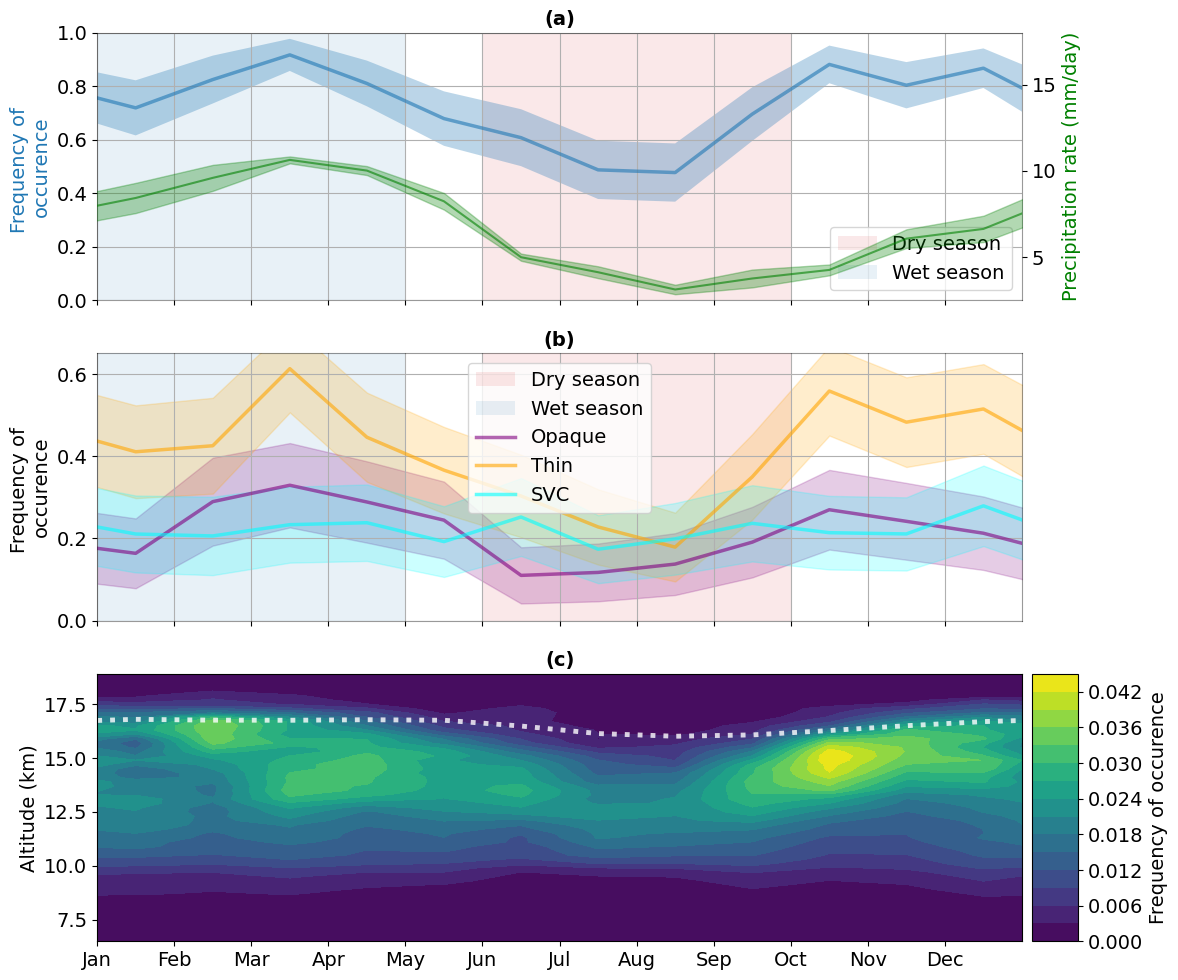

In [25]:
fig, ax = plt.subplots(figsize=(12,10), sharex=True, nrows=3)
cax = []
for axi in ax:
    divider1 = make_axes_locatable(axi)
    cax.append(divider1.append_axes("right", size="5%", pad=0.1))
ciclo_anual(ax[0], '(a)', cax[0])
ciclo_anual_cat(ax[1], '(b)', cax[1])
prob(ax[2], '(c)', cax[2])

fig.tight_layout()
plt.savefig(f"{DIR_SAVE}/sazonal_freq_ocorrencia", dpi=300)
plt.show()

# Propriedades Ópticas e Geométricas
## Histogramas

In [26]:
def create_histogram(column, divide=False, nbins=50, ax_=None, order=None):
    """
    Creates a histogram of the given column in the dataframe, separated by the period.

    Args:
    df: pandas DataFrame
    column: string, name of the column to create the histogram for (z_bases or z_tops)

    Returns:
    None
    """

    nbins = np.arange(8, 20.5, .5) if column in ["z_bases", "z_tops"] else nbins
    nbins = np.arange(0, 8.5, .5) if column in ["thickness"] else nbins
    nbins = np.arange(-9, 4.5, .5) if column in ["tropopause_top", "tropopause_base"] else nbins

    df_ = df[df.cirrus]
    total_data = df_[column].copy()
    dry_data = df_[df_.period.isin(['Dry'])][column].copy()
    wet_data = df_[df_.period.isin(['Wet'])][column].copy()

    if divide:
        total_data /= 1e3
        dry_data /= 1e3
        wet_data /= 1e3

    if order is not None:
        ax_.text(.9, 0.5, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')

    if column != "cod":
        if column == "lidar_ratio":
            total_data = total_data[df_.lidar_ratio != 25]
            dry_data = dry_data[df_.lidar_ratio != 25]
            wet_data = wet_data[df_.lidar_ratio != 25]
        ax_.hist(total_data, alpha=0.7, bins=nbins, weights=np.full(len(total_data), 1/len(total_data)), edgecolor='k',
                histtype='step', linewidth=2.5, label=LABELS_PERIOD[0])
        ax_.hist(dry_data, alpha=0.7, bins=nbins, weights=np.full(len(dry_data), 1/len(dry_data)), edgecolor='#d62728',
                histtype='step', linewidth=2, label=LABELS_PERIOD[3])
        ax_.hist(wet_data, alpha=0.7, bins=nbins, weights=np.full(len(wet_data), 1/len(wet_data)),edgecolor='#1f77b4',
                histtype='step', linewidth=2, label=LABELS_PERIOD[1])
    else:
        xmin = total_data.min() * 10
        xmax = total_data.max() * 10
        bins = np.logspace(np.log10(xmin), np.log10(xmax), nbins)
        ax_.hist(total_data, alpha=0.7, bins=bins, weights=np.full(len(total_data), 1/len(total_data)), edgecolor='k',
                histtype='step', linewidth=2.5, label=LABELS_PERIOD[0])
        ax_.hist(dry_data, alpha=0.7, bins=bins, weights=np.full(len(dry_data), 1/len(dry_data)), edgecolor='#d62728',
                histtype='step', linewidth=2, label=LABELS_PERIOD[3])
        ax_.hist(wet_data, alpha=0.5, bins=bins, weights=np.full(len(wet_data), 1/len(wet_data)),edgecolor='#1f77b4',
                histtype='step', linewidth=2, label=LABELS_PERIOD[1])
        ax_.set_xscale("log")

    ax_.set_xlabel(LABELS[column], fontsize=17)
    if (column == "z_bases") | (column == "z_tops") | (column=="tropopause_base") | (column=="thickness") | (column=="cod"):
        ax_.set_ylabel('Relative frequency', fontsize=17)

    if (column=="z_bases"):
        ax_.legend(loc='upper right')
    ax_.grid()

    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)

def create_histogram_cate(column, period="Total", divide=False, nbins=15, ax_=None, order=None):
    """
    Creates a histogram of the given column in the dataframe, separated by the period.

    Args:
    df: pandas DataFrame
    column: string, name of the column to create the histogram for (z_bases or z_tops)

    Returns:
    None
    """
    nbins = np.arange(8, 20.5, .5) if column in ["z_bases", "z_tops"] else nbins
    nbins = np.arange(0, 10.5, .5) if column in ["thickness"] else nbins
    nbins = np.arange(-9, 4.5, .5) if column in ["tropopause_top", "tropopause_base"] else nbins

    df_ = (df[(df.cirrus) ]
           if period=="Total"
           else df[((df.cirrus)) & (df.period == period)])

    df_ = df_[df_.lidar_ratio != 25] if column=="lidar_ratio" else df_.copy()

    total_data = df_[column]
    thin_data = df_[df_['class_'] == 'thin'][column]
    subvisual_data = df_[df_['class_'] == 'subvisual'][column]
    opaque_data = df_[df_['class_'] == 'opaque'][column]

    if divide:
        total_data /= 1e3
        thin_data /= 1e3
        subvisual_data /= 1e3
        opaque_data /= 1e3

    if order is not None:
        ax_.text(.9, 0.5, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')
    if column != "cod":
        ax_.hist(subvisual_data, alpha=0.5, bins=nbins, weights=np.full(len(subvisual_data), 1/len(subvisual_data)), edgecolor='#00FFFF',
            histtype='step', linewidth=2.5, label=LABELS_CAT[2])
        ax_.hist(thin_data, alpha=0.7, bins=nbins, weights=np.full(len(thin_data), 1/len(thin_data)), edgecolor='#FFA500',
                histtype='step', linewidth=2.5, label=LABELS_CAT[1])
        ax_.hist(opaque_data, alpha=0.7, bins=nbins, weights=np.full(len(opaque_data), 1/len(opaque_data)),edgecolor='#800080',
                histtype='step', linewidth=2.5, label=LABELS_CAT[0])
    else:
        xmin = 0.005
        xmax = total_data.max()
        bins = np.logspace(np.log10(xmin), np.log10(xmax), nbins)
        ax_.hist(subvisual_data, alpha=0.5, bins=bins, weights=np.full(len(subvisual_data), 1/len(subvisual_data)), edgecolor='#00FFFF',
            histtype='step', linewidth=2.5, label=LABELS_CAT[2])
        ax_.hist(thin_data, alpha=0.7, bins=bins, weights=np.full(len(thin_data), 1/len(thin_data)), edgecolor='#FFA500',
                histtype='step', linewidth=2.5, label=LABELS_CAT[1])
        ax_.hist(opaque_data, alpha=0.7, bins=bins, weights=np.full(len(opaque_data), 1/len(opaque_data)),edgecolor='#800080',
                histtype='step', linewidth=2.5, label=LABELS_CAT[0])
        ax_.set_xscale("log")

    # Set the labels and title
    try:
        ax_.set_xlabel(LABELS[column], fontsize=17)
    except:
        ax_.set_xlabel(column)
    if (column == "z_bases") | (column == "thickness") | (column == 'tropopause_base'):
        ax_.set_ylabel('Relative frequency', fontsize=17)

    # Add the legend
    if (column=="z_bases"):
        ax_.legend(loc='upper right')
    ax_.grid()

    # Show the plot
    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)

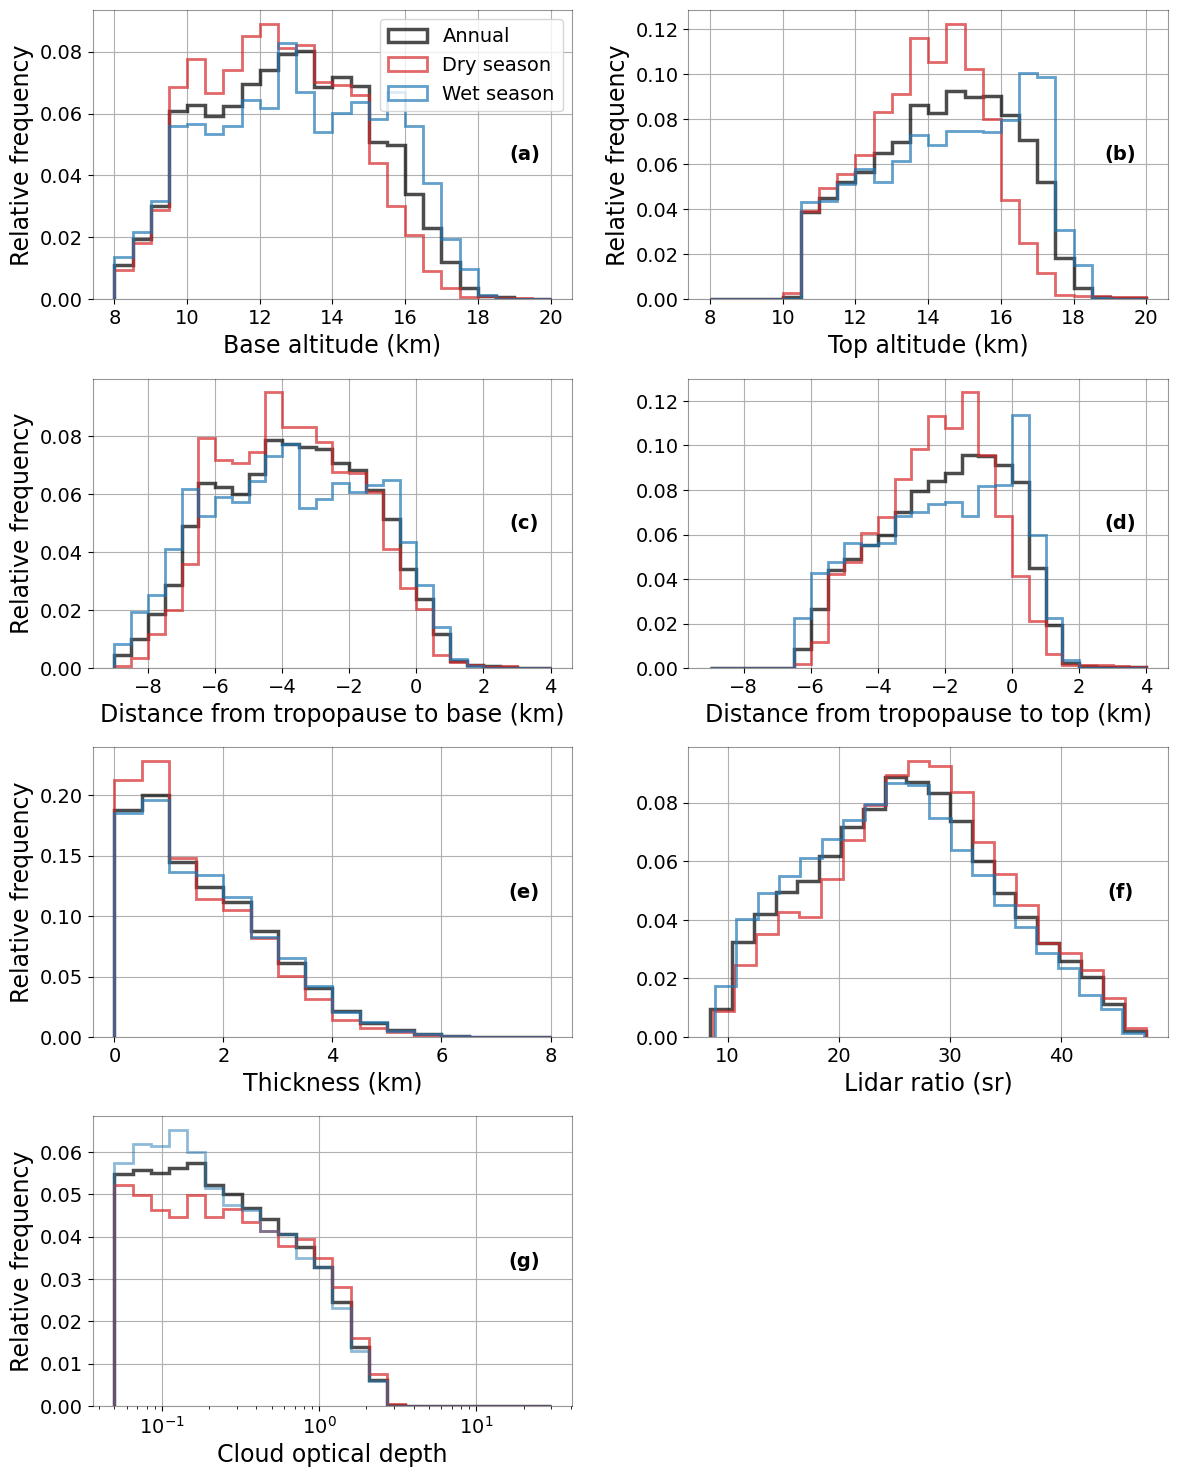

In [27]:
fig, ax = plt.subplots(figsize=(12,15), sharex=False, nrows=4, ncols=2)
ax[3, 1].axis('off')
create_histogram('z_bases', divide=True, nbins=25, ax_=ax[0,0], order='(a)')
create_histogram('z_tops', divide=True, nbins=25, ax_=ax[0,1], order='(b)')
create_histogram('tropopause_base', divide=True, nbins=25, ax_=ax[1,0], order='(c)')
create_histogram('tropopause_top', divide=True, nbins=25, ax_=ax[1,1], order='(d)')
create_histogram('thickness', divide=True, nbins=25, ax_=ax[2,0], order='(e)')
create_histogram('lidar_ratio', divide=False, nbins=20, ax_=ax[2,1], order='(f)')
create_histogram('cod', divide=False, nbins=25, ax_=ax[3,0], order='(g)')

fig.tight_layout()
plt.savefig(f"{DIR_SAVE}/hist_vars", dpi=300)
plt.show()

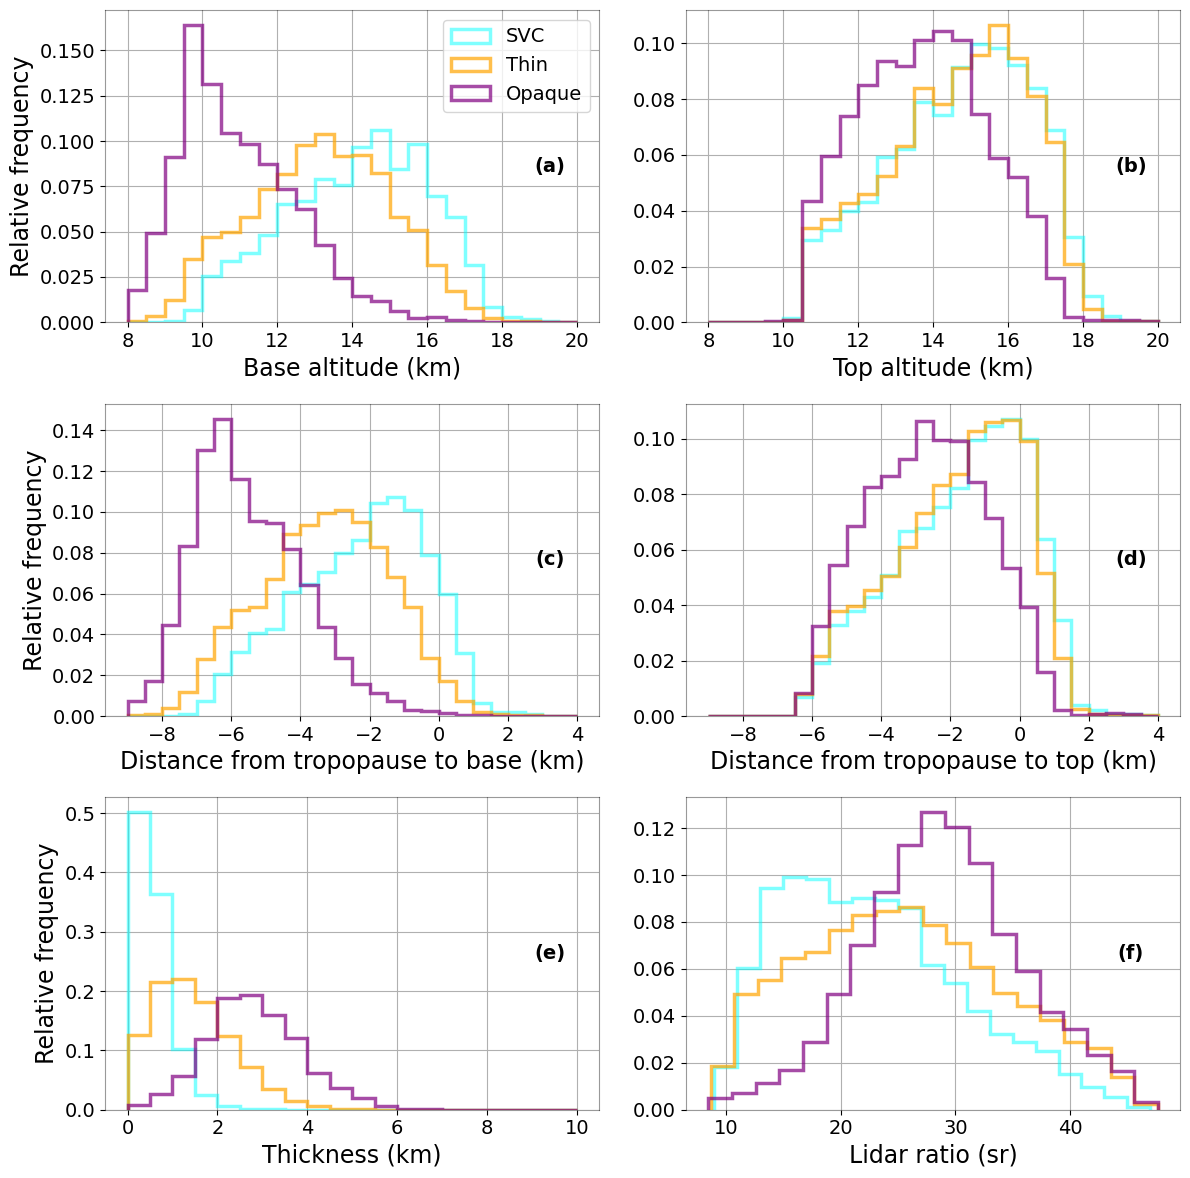

In [28]:
fig, ax = plt.subplots(figsize=(12,12), sharex=False, nrows=3, ncols=2)

create_histogram_cate('z_bases', period="Total", divide=True, nbins=19, ax_=ax[0,0], order='(a)')
create_histogram_cate('z_tops', period="Total", divide=True, nbins=19, ax_=ax[0,1], order='(b)')
create_histogram_cate('tropopause_base', period="Total", divide=True, nbins=19, ax_=ax[1,0], order='(c)')
create_histogram_cate('tropopause_top', period="Total", divide=True, nbins=19, ax_=ax[1,1], order='(d)')
create_histogram_cate('thickness', period="Total", divide=True, nbins=19, ax_=ax[2,0], order='(e)')
create_histogram_cate('lidar_ratio', period="Total", nbins=19, ax_=ax[2,1], order='(f)')

fig.tight_layout()
plt.savefig(f"{DIR_SAVE}/hist_cat", dpi=300)
plt.show()

## Ciclo diurno

In [29]:
  def diurnal_cycle(var, divide=False, var_label=None, dim=(6,4), xlabel=True, legend=True, ax_=None, order=None):
    df_ = df[df.cirrus]

    df_ = (df_[(df_.lidar_ratio != 25)].drop_duplicates('time') if var=="lidar_ratio" else df_.copy())

    data_total = df_.groupby("hour")[var].mean()
    data_wet = df_[df_['period'] == 'Wet'].groupby("hour")[var].mean()
    data_dry = df_[df_['period'] == 'Dry'].groupby("hour")[var].mean()

    data_total_std = (df_.groupby("hour")[var].std(ddof=1)
                      / np.sqrt(df_.groupby("hour")[var].count()))
    df_temp = df.groupby(["period", "hour"])[var]
    data_wet_std = df_temp.std(ddof=1).loc["Wet"] / np.sqrt(df_temp.count().loc["Wet"])
    data_dry_std = df_temp.std(ddof=1).loc["Dry"] / np.sqrt(df_temp.count().loc["Dry"])

    data_total = pd.concat([data_total,
                            pd.Series({12:np.nan, 13:np.nan})]).sort_index()
    data_wet = pd.concat([data_wet,
                              pd.Series({12:np.nan, 13:np.nan})]).sort_index()
    data_dry = pd.concat([data_dry,
                           pd.Series({12:np.nan, 13:np.nan})]).sort_index()

    if divide:
        for data in [data_total, data_wet, data_dry, data_total_std, data_wet_std, data_dry_std]:
            data /= 1e3

    if order is not None:
        ax_.text(.5, 0.9, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')

    colors = ["#1f77b4", "#d62728", "k"]
    labels = ["Wet", "Dry", "Annual"]
    for i, (data, data_std) in enumerate(zip([data_wet, data_dry, data_total],
                                             [data_wet_std, data_dry_std, data_total_std])):

        ax_.plot(data.index, data, color=colors[i], linewidth=2.5, alpha=0.7, label=labels[i])
        ax_.fill_between(data.index, data - data_std, data + data_std,
                        color=colors[i], alpha=0.2)

    ax_.set_ylabel(var_label, fontsize=17)
    if xlabel:
        ax_.set_xlabel("Local time (h)", fontsize=17)

    if legend:
        ax_.legend()
    ax_.grid()
    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)

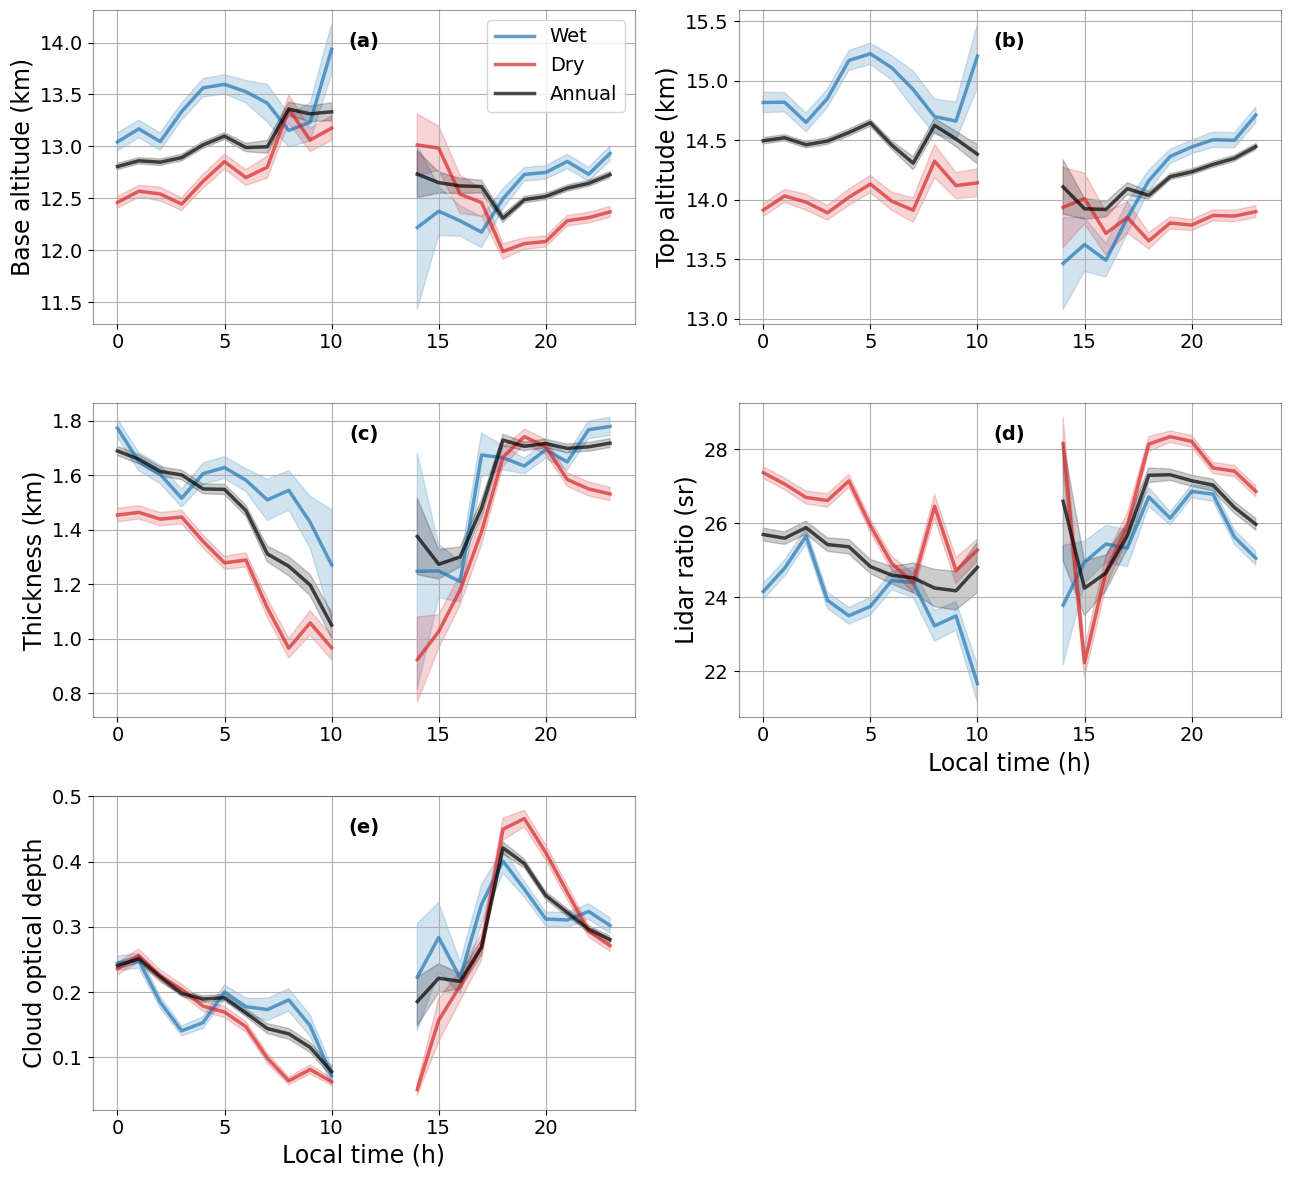

In [30]:
fig, ax = plt.subplots(figsize=(13,12), sharex=False, nrows=3, ncols=2)
ax[2, 1].axis('off')
diurnal_cycle('z_bases', divide=True, var_label=LABELS['z_bases'], xlabel=0, legend=1, ax_=ax[0,0], order='(a)')
diurnal_cycle('z_tops', divide=True, var_label=LABELS['z_tops'], xlabel=0, legend=0, ax_=ax[0,1], order='(b)')
diurnal_cycle('thickness', divide=True, var_label=LABELS['thickness'], xlabel=0, legend=0, ax_=ax[1,0], order='(c)')
diurnal_cycle("lidar_ratio", var_label=LABELS["lidar_ratio"], legend=False, ax_=ax[1,1], order='(d)')
diurnal_cycle("cod", var_label=LABELS["cod"], legend=False, ax_=ax[2,0], order='(e)')

fig.tight_layout()
plt.savefig(f"{DIR_SAVE}/ciclo_vars", dpi=300)
plt.show()

### Classes

In [31]:
def diurnal_cycle_cat(var, divide=False, var_label=None, dim=(6,4), xlabel=True, legend=True, name=None, period=None, ax_=None, order=None):
    df_ = df[df.cirrus]

    if period is not None:
        df_ = df_[df_.period == period]

    df_ = (df_[df_.lidar_ratio != 25].drop_duplicates('time') if var=="lidar_ratio" else df_.copy())

    df_ = (df_
           .assign(time=lambda x: pd.to_datetime(x.time))
           .assign(hour=lambda x: np.floor(x.time.dt.hour + (x.time.dt.minute / 60) + 0.5) % 24))

    data_opaque = df_[df_['class_'] == 'opaque'].groupby("hour")[var].mean()
    data_thin = df_[df_['class_'] == 'thin'].groupby("hour")[var].mean()
    data_svc = df_[df_['class_'] == 'subvisual'].groupby("hour")[var].mean()

    # print(f'opaque - {var}')
    # print(data_opaque)
    # print(f'thin - {var}')
    # print(data_thin)
    # print(f'svc - {var}')
    # print(data_svc)

    data_opaque_std = df_[df_['class_'] == 'opaque'].groupby("hour")[var].std(ddof=1) / np.sqrt(df_[df_['class_'] == 'opaque'].groupby("hour")[var].count())
    data_thin_std = df_[df_['class_'] == 'thin'].groupby("hour")[var].std(ddof=1) / np.sqrt(df_[df_['class_'] == 'thin'].groupby("hour")[var].count())
    data_svc_std = df_[df_['class_'] == 'subvisual'].groupby("hour")[var].std(ddof=1) / np.sqrt(df_[df_['class_'] == 'subvisual'].groupby("hour")[var].count())

    if divide:
        for data in [data_opaque , data_thin , data_svc , data_opaque_std , data_thin_std , data_svc_std]:
            data /= 1e3

    for data in [data_opaque , data_thin , data_svc , data_opaque_std , data_thin_std , data_svc_std]:
          data.loc[11:13] = np.nan

    data_svc = pd.concat([data_svc, pd.Series([np.nan, np.nan], index=[12, 13])]).sort_index()
    data_thin = pd.concat([data_thin, pd.Series([np.nan, np.nan], index=[12, 13])]).sort_index()
    data_opaque = pd.concat([data_opaque, pd.Series([np.nan, np.nan], index=[12, 13])]).sort_index()

    colors = ['#800080', '#FFA500', '#00FFFF']

    if order is not None:
        ax_.text(.5, 0.9, order, transform=ax_.transAxes, verticalalignment='center',
                 horizontalalignment='center', weight='bold')

    for i, (data, data_std) in enumerate(zip([data_opaque, data_thin, data_svc],
                                             [data_opaque_std, data_thin_std, data_svc_std])):
        ax_.plot(data.index, data, color=colors[i], linewidth=2.5, alpha=0.7, label=LABELS_CAT[i])
        ax_.fill_between(data.index, data - data_std, data + data_std,
                        color=colors[i], alpha=0.2)

    ax_.set_ylabel(var_label, fontsize=17)
    if (var == 'cod'):
        ax_.set_yscale('log')
    if xlabel:
        ax_.set_xlabel("Local time (h)", fontsize=17)
    if legend:
        ax_.legend()
    ax_.grid()
    for side in ['right', 'top', 'bottom', 'left']:
        ax_.spines[side].set_alpha(0.4)

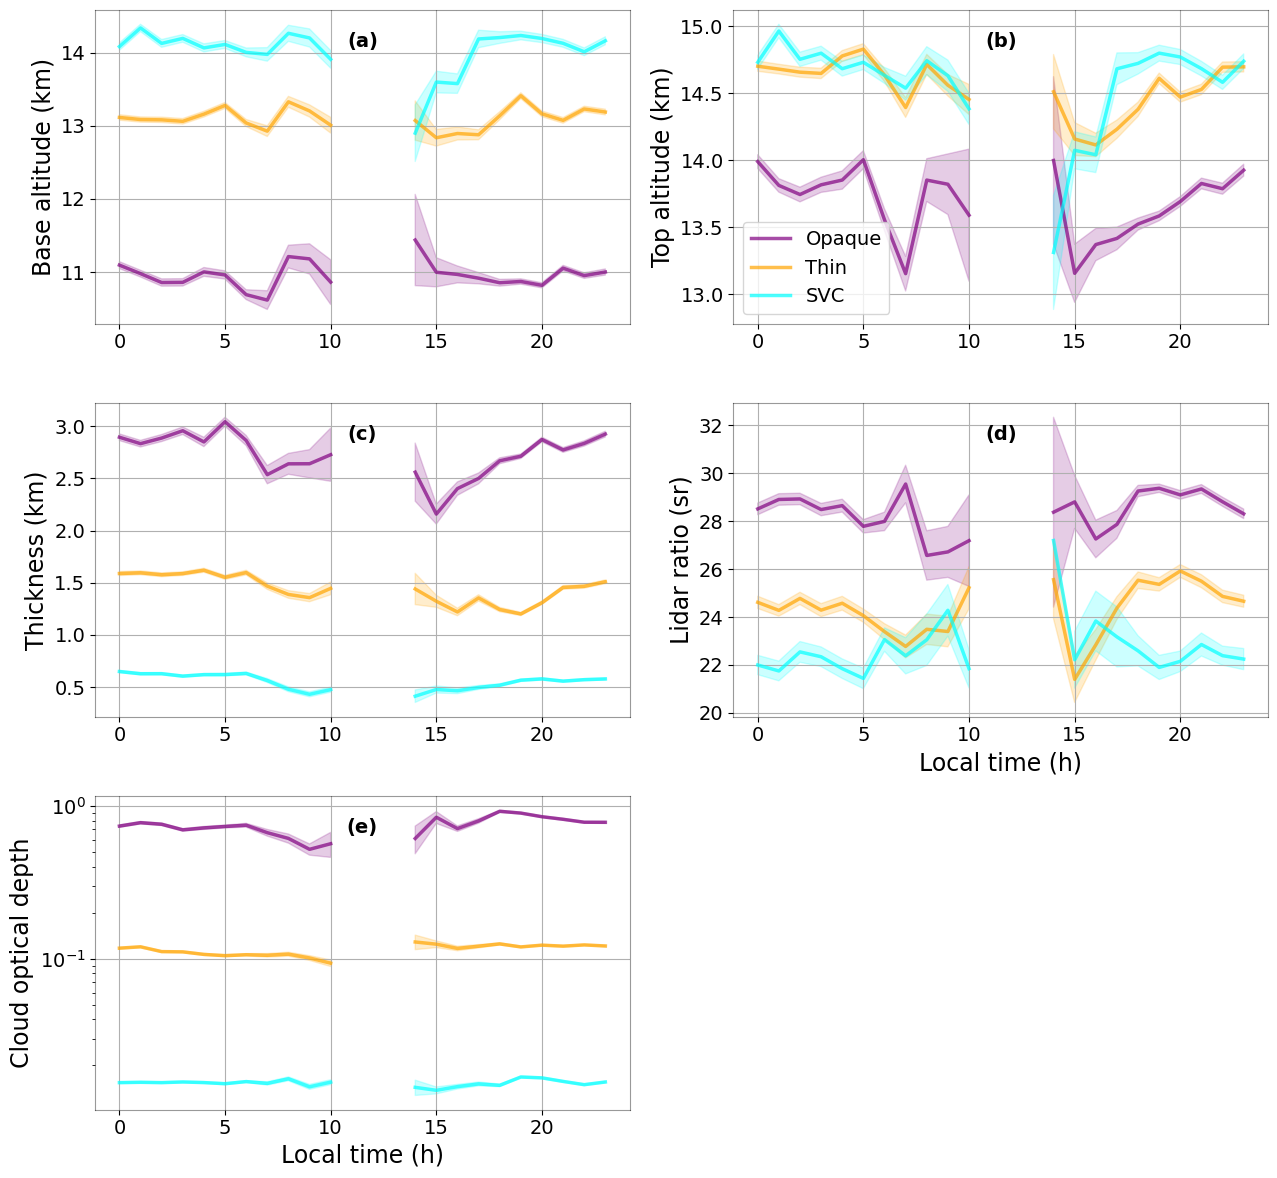

In [32]:
fig, ax = plt.subplots(figsize=(13,12), sharex=False, nrows=3, ncols=2)
ax[2, 1].axis('off')
diurnal_cycle_cat('z_bases', divide=True, var_label=LABELS['z_bases'], xlabel=0, legend=0, ax_=ax[0,0], order='(a)')
diurnal_cycle_cat('z_tops', divide=True, var_label=LABELS['z_tops'], xlabel=0, legend=1, ax_=ax[0,1], order='(b)')
diurnal_cycle_cat('thickness', divide=True, var_label=LABELS['thickness'], xlabel=0, legend=0, ax_=ax[1,0], order='(c)')
diurnal_cycle_cat("lidar_ratio", var_label=LABELS["lidar_ratio"], legend=False, ax_=ax[1,1], order='(d)')
diurnal_cycle_cat("cod", var_label=LABELS["cod"], legend=False, ax_=ax[2,0], order='(e)')

fig.tight_layout()
plt.savefig(f"{DIR_SAVE}/ciclo_cat", dpi=300)
plt.show()

## Ciclo Anual

In [33]:
MONTHS = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec",
]

def compute_percentile(df_: pd.DataFrame, var_x: str, var_y: str, percentils=[25, 75]):
    """Compute the chosen *percentils* of *var_y* for every category of *var_x*.

    *The call signature and return type are identical to the legacy version.*
    """
    perc = []
    varx_perc = []

    for percentil in percentils:
        perc_vals = []
        for varx in df_[var_x].unique():
            vals = df_.loc[df_[var_x] == varx, var_y].dropna()
            varx_perc.append(varx)
            perc_vals.append(np.percentile(vals, percentil))
        perc.append(perc_vals)

    data = {"var_x": varx_perc[: len(perc_vals)]}
    for percentil, vals in zip(percentils, perc):
        data[f"percentil_{percentil}"] = vals

    return (
        pd.DataFrame(data)
        .sort_values(by="var_x", ignore_index=True)
        .set_index("var_x")
    )


def plot_hist2d(
    var_x,
    var_y,
    divide=False,
    ybins=30,
    percentils=[25, 75],
    colors=None,
    log=False,
    class_=None,
    vmax=None,
    colorbar=True,
    ax_=None,
    cax_=None,
    order=None,
):
    """2D hist de var_x × var_y com mediana e percentis.

    - Histograma é calculado com duplicatas (Dez→0, Jan→13) e mostrado de 0..13,
      ou seja, do começo de janeiro ao final de dezembro.
    - Curvas (mediana/percentis) ficam centralizadas nos meses (x=1..12) e
      são estendidas para x=0 (dezembro) e x=13 (janeiro).
    """

    df_ = df[df.cirrus].copy()
    if class_ is not None:
        df_ = df_.loc[df_.class_ == class_].copy()

    if var_y == "lidar_ratio":
        mask = (df_.lidar_ratio != 25) & (~df_.lidar_ratio.isnull())
        df_ = df_.loc[mask].drop_duplicates("time").copy()

    if divide:
        df_[var_y] = df_[var_y] / 1e3

    # --- Duplicatas para continuidade ---
    dec_df = df_.loc[df_[var_x] == 12].copy(); dec_df[var_x] = 0
    jan_df = df_.loc[df_[var_x] == 1].copy();  jan_df[var_x] = 13
    df_ext = pd.concat([dec_df, df_, jan_df], ignore_index=True)

    # Percentis por mês (com 0 e 13 incluídos)
    df_perc = compute_percentile(df_ext, var_x, var_y, percentils=percentils)
    # Mediana por mês (com 0 e 13 incluídos)
    med_series = df_ext.groupby(var_x)[var_y].median().sort_index()

    # --- Bins do histograma ---
    if log:
        ymin, ymax = df_ext[var_y].min(), df_ext[var_y].max()
        y_edges = np.logspace(np.log10(ymin), np.log10(ymax), num=ybins)
    else:
        y_edges = (np.linspace(8, 20.5, ybins) if var_y in {"z_bases", "z_tops"} else ybins)

    # x_edges cobrem duplicatas (0 e 13) e sobram 0.5 para dentro do bin
    x_edges = np.arange(-0.5, 14.5, 1.0)  # centros em 0..14

    hist_raw, xedges, yedges = np.histogram2d(
        df_ext[var_x].to_numpy(),
        df_ext[var_y].to_numpy(),
        bins=(x_edges, y_edges),
    )

    # Normaliza por coluna (por mês no eixo x)
    denom = hist_raw.sum(axis=1)
    denom[denom == 0] = 1
    hist = hist_raw.T / denom

    x_centres = (xedges[:-1] + xedges[1:]) / 2.0  # -0..14

    # --- Figura/Eixo ---
    if ax_ is None:
        fig, ax_ = plt.subplots(figsize=(7, 4))
    else:
        fig = ax_.figure

    # Mostrar do começo de Jan (0) ao fim de Dez (13)
    h = ax_.contourf(
        x_centres,
        yedges[:-1],
        hist,
        cmap="viridis",
        vmin=0,
        vmax=vmax,
        levels=15,
    )

    # --- Curvas centralizadas e estendidas ---
    valid_months = np.arange(1, 13)        # 1..12 (centros dos meses)
    x_curve = np.r_[0, valid_months, 13]   # Dez, Jan..Dez, Jan

    # Mediana
    med_plot = med_series.reindex(x_curve)
    ax_.plot(x_curve, med_plot, "k-", alpha=0.58, lw=3, label="Median")

    # Percentis
    for col, style in zip(df_perc.columns, ["k-.", "k--"]):
        ax_.plot(x_curve, df_perc.loc[x_curve, col], style, alpha=0.58, lw=3, label=LABELS[col])

    # Tropopausa (somente se z_tops)
    if var_y == "z_tops":
        tropo_ext = np.r_[TROPOPAUSE_LIST[-1], TROPOPAUSE_LIST, TROPOPAUSE_LIST[0]]  # len=14
        ax_.plot(x_curve, tropo_ext, ":w", alpha=0.8, lw=4, label="Tropopause")
    else:
        ax_.plot([], [], ":w", alpha=0.8, lw=3.5, label="Tropopause")

    # --- Eixos e rótulos ---
    ax_.set_xlim(1, 13)                        # início de Jan (0) ao fim de Dez (13)
    ax_.set_xticks(valid_months, MONTHS)       # só 12 ticks (Jan..Dec)
    ax_.set_ylabel(LABELS[var_y], fontsize=17)

    if var_y == "z_tops":
        ax_.legend(fontsize=15, loc="center left", bbox_to_anchor=(1.0, 0.5))

    # --- Colorbar ---
    if colorbar:
        if cax_ is None:
            cbar = fig.colorbar(h, ax=ax_, ticks=np.linspace(0, vmax, 5))
        else:
            cbar = fig.colorbar(h, cax=cax_, ticks=np.linspace(0, vmax, 5))
        cbar.set_label("Relative frequency", fontsize=17)
    else:
        if cax_ is not None:
            cax_.axis("off")

    if log:
        ax_.set_yscale("log")

    if order is not None:
        ax_.text(0.5, 1.05, order, transform=ax_.transAxes, va="center", ha="center", weight="bold")

    return ax_


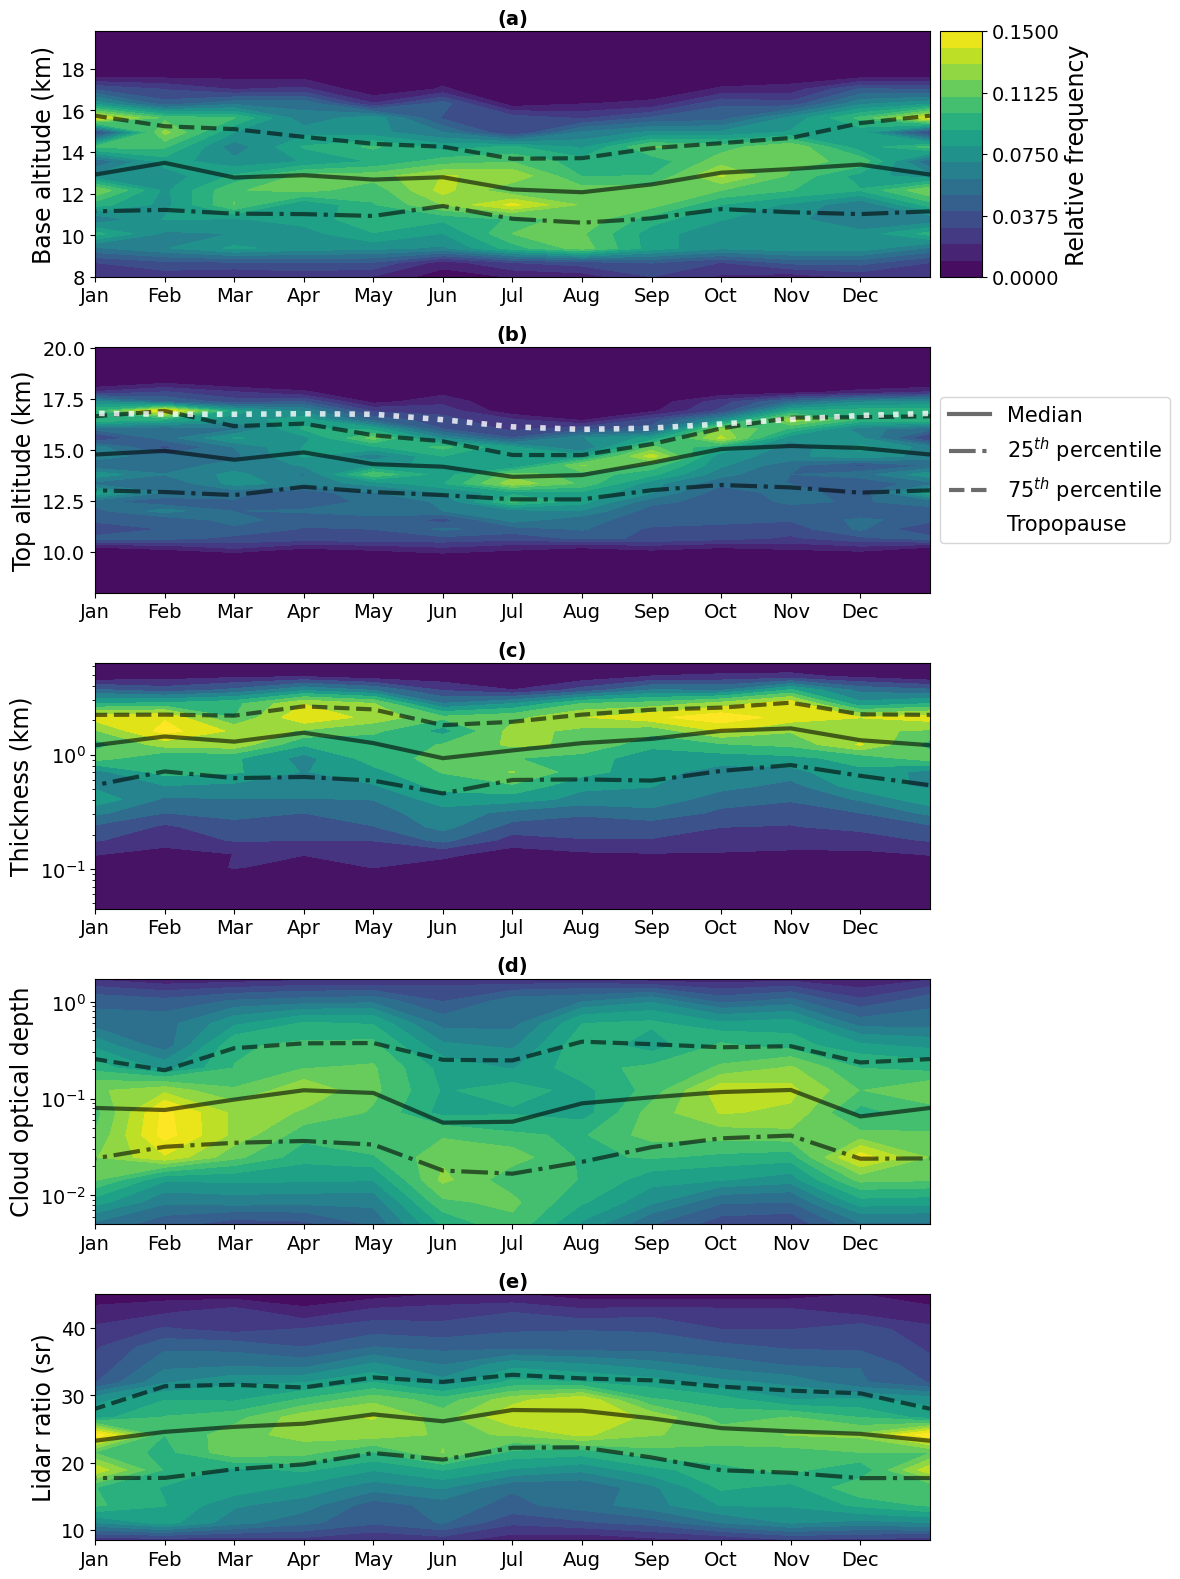

In [34]:
fig, ax = plt.subplots(figsize=(12,16), sharex=False, nrows=5, ncols=1)
cax = []
for axi in ax:
    divider1 = make_axes_locatable(axi)
    cax.append(divider1.append_axes("right", size="5%", pad=0.1))
vmax = .15

plot_hist2d("month", 'z_bases', True, ybins=19, vmax=vmax, colorbar=True, ax_=ax[0], cax_=cax[0], order='(a)')
plot_hist2d("month", 'z_tops', True, ybins=29, vmax=vmax, colorbar=False, ax_=ax[1], cax_=cax[1], order='(b)')
plot_hist2d("month", 'thickness', True, ybins=20, log=True, vmax=vmax, colorbar=False, ax_=ax[2], cax_=cax[2], order='(c)')
plot_hist2d("month", 'cod', False, ybins=13, log=True, vmax=vmax, colorbar=False, ax_=ax[3], cax_=cax[3], order='(d)')
plot_hist2d("month", 'lidar_ratio', False, ybins=15, vmax=vmax, colorbar=False, ax_=ax[4], cax_=cax[4], order='(e)')

fig.tight_layout()
plt.savefig(f"{DIR_SAVE}/anual_vars", dpi=300)
plt.show()

# Tabelas

In [35]:
def create_latex_table(total, wet, trans, dry):
    rows = [
        "No. of layers",
        "Base height (km)",
        "Top height (km)",
        "Thickness (km)",
        "Lidar ratio (sr)",
        "Cloud optical depth",
        "Base above tropopause (\\%)",
        "Top above tropopause (\\%)",
        "Relative frequency of opaque cirrus (\\%)",
        "Relative frequency of thin cirrus (\\%)",
        "Relative frequency of SVC (\\%)"
    ]


    for i in range(len(rows)):
        print(rows[i] + f" & {total[i]} & {wet[i]} & {trans[i]} & {dry[i]} \\\\".replace('.', '.'))


def table_fill():
    df_vars = df[df.cirrus & (df.cod >= 0.005)]

    df_lr = df_vars[df_vars.lidar_ratio != 25].drop_duplicates('time')

    total = []
    wet = []
    trans = []
    dry = []

    total.append(df_vars.count()["time"])
    wet.append(df_vars[df_vars.period == "Wet"].count()["time"])
    trans.append(df_vars[df_vars.period == "Trans"].count()["time"])
    dry.append(df_vars[df_vars.period == "Dry"].count()["time"])

    for variable in ["z_bases", "z_tops"]:
        df_vars.loc[:, variable] /= 1e3
        grouped = df_vars.groupby("period")[variable]
        total.append(f"{df_vars[variable].mean():.1f} ({df_vars[variable].std(ddof=1):.1f})")
        wet.append(f"{grouped.mean().loc['Wet']:.1f} ({grouped.std(ddof=1).loc['Wet']:.1f})")
        trans.append(f"{grouped.mean().loc['Trans']:.1f} ({grouped.std(ddof=1).loc['Trans']:.1f})")
        dry.append(f"{grouped.mean().loc['Dry']:.1f} ({grouped.std(ddof=1).loc['Dry']:.1f})")

    variable = "thickness"
    df_vars.loc[:, variable] /= 1e3
    grouped = df_vars.groupby("period")[variable]
    total.append(f"{df_vars[variable].mean():.2f} ({df_vars[variable].std(ddof=1):.2f})")
    wet.append(f"{grouped.mean().loc['Wet']:.2f} ({grouped.std(ddof=1).loc['Wet']:.2f})")
    trans.append(f"{grouped.mean().loc['Trans']:.2f} ({grouped.std(ddof=1).loc['Trans']:.2f})")
    dry.append(f"{grouped.mean().loc['Dry']:.2f} ({grouped.std(ddof=1).loc['Dry']:.2f})")

    grouped = df_lr.groupby("period")["lidar_ratio"]
    total.append(f"{df_lr['lidar_ratio'].mean():.1f} ({df_lr['lidar_ratio'].std(ddof=1):.1f})")
    wet.append(f"{grouped.mean().loc['Wet']:.1f} ({grouped.std(ddof=1).loc['Wet']:.1f})")
    trans.append(f"{grouped.mean().loc['Trans']:.1f} ({grouped.std(ddof=1).loc['Trans']:.1f})")
    dry.append(f"{grouped.mean().loc['Dry']:.1f} ({grouped.std(ddof=1).loc['Dry']:.1f})")

    grouped = df_vars.groupby("period")['cod']
    total.append(f"{df_vars['cod'].mean():.2f} ({df_vars['cod'].std(ddof=1):.2f})")
    wet.append(f"{grouped.mean().loc['Wet']:.2f} ({grouped.std(ddof=1).loc['Wet']:.2f})")
    trans.append(f"{grouped.mean().loc['Trans']:.2f} ({grouped.std(ddof=1).loc['Trans']:.2f})")
    dry.append(f"{grouped.mean().loc['Dry']:.2f} ({grouped.std(ddof=1).loc['Dry']:.2f})")

    for variable in ['tropopause_base_bool', 'tropopause_top_bool']:
        grouped = df_vars.groupby("period")[variable].mean()
        total.append(f"{(df_vars[variable].mean() * 100):.1f}")
        wet.append(f"{(grouped.loc['Wet'] * 100):.1f}")
        trans.append(f"{(grouped.loc['Trans'] * 100):.1f}")
        dry.append(f"{(grouped.loc['Dry'] * 100):.1f}")

    for cat in ['opaque', 'thin', 'subvisual']:
        df_temp = df_vars.dropna()
        grouped = df_temp[df_temp.class_ == cat].groupby("period")['time'].count()
        grouped_total = df_temp.groupby("period")['time'].count()

        total.append(f"{(df_temp[df_temp.class_ == cat].count()['time'] / df_temp.count()['time'] * 100):.1f}")
        wet.append(f"{(grouped.loc['Wet'] / grouped_total.loc['Wet'] * 100):.1f}")
        trans.append(f"{(grouped.loc['Trans'] / grouped_total.loc['Trans'] * 100):.1f}")
        dry.append(f"{(grouped.loc['Dry'] / grouped_total.loc['Dry'] * 100):.1f}")

    create_latex_table(total, wet, trans, dry)


def create_latex_table_cate(total, wet, trans, dry, class_):
    print("\\hline")
    print(f"\\multicolumn{{5}}{{l}}{{{class_}}} \\\\")
    print("\\hline")

    rows = [
        "No. of layers",
        "Base height (km)",
        "Top height (km)",
        "Thickness (km)",
        "Lidar ratio (sr)",
        "Cloud optical depth",
        "Frequency of occurrence (\\%)"
    ]

    for i in range(len(rows)):
        print(rows[i] + f" & {total[i]} & {wet[i]} & {trans[i]} & {dry[i]} \\\\".replace('.', '.'))


def table_fill_cat():
    ptbr_to_en = {'opaque': 'Opaque layers', 'subvisual': 'SVC layers', 'thin': 'Thin layers'}

    df_vars = df[df.cirrus & (df.cod >= 0.005)]

    df_lr = df_vars[df_vars.lidar_ratio != 25].drop_duplicates('time')

    for class_ in ["opaque", "thin", "subvisual"]:
        total = []
        wet = []
        trans = []
        dry = []

        df_vars_temp = df_vars[df_vars.class_ == class_]
        df_lr_temp = df_lr[df_lr.class_ == class_]

        total.append(df_vars_temp.count()["time"])
        wet.append(df_vars_temp[df_vars_temp.period == "Wet"].count()["time"])
        trans.append(df_vars_temp[df_vars_temp.period == "Trans"].count()["time"])
        dry.append(df_vars_temp[df_vars_temp.period == "Dry"].count()["time"])

        for variable in ["z_bases", "z_tops"]:
            df_vars_temp.loc[:, variable] /= 1e3
            grouped = df_vars_temp.groupby("period")[variable]
            total.append(f"{df_vars_temp[variable].mean():.1f} ({df_vars_temp[variable].std(ddof=1):.1f})")
            wet.append(f"{grouped.mean().loc['Wet']:.1f} ({grouped.std(ddof=1).loc['Wet']:.1f})")
            trans.append(f"{grouped.mean().loc['Trans']:.1f} ({grouped.std(ddof=1).loc['Trans']:.1f})")
            dry.append(f"{grouped.mean().loc['Dry']:.1f} ({grouped.std(ddof=1).loc['Dry']:.1f})")

        variable = "thickness"
        df_vars_temp.loc[:, variable] /= 1e3
        grouped = df_vars_temp.groupby("period")[variable]
        total.append(f"{df_vars_temp[variable].mean():.2f} ({df_vars_temp[variable].std(ddof=1):.2f})")
        wet.append(f"{grouped.mean().loc['Wet']:.2f} ({grouped.std(ddof=1).loc['Wet']:.2f})")
        trans.append(f"{grouped.mean().loc['Trans']:.2f} ({grouped.std(ddof=1).loc['Trans']:.2f})")
        dry.append(f"{grouped.mean().loc['Dry']:.2f} ({grouped.std(ddof=1).loc['Dry']:.2f})")

        grouped = df_lr_temp.groupby("period")["lidar_ratio"]
        total.append(f"{df_lr_temp['lidar_ratio'].mean():.1f} ({df_lr_temp['lidar_ratio'].std(ddof=1):.1f})")
        wet.append(f"{grouped.mean().loc['Wet']:.1f} ({grouped.std(ddof=1).loc['Wet']:.1f})")
        trans.append(f"{grouped.mean().loc['Trans']:.1f} ({grouped.std(ddof=1).loc['Trans']:.1f})")
        dry.append(f"{grouped.mean().loc['Dry']:.1f} ({grouped.std(ddof=1).loc['Dry']:.1f})")

        if class_ != "subvisual":
            grouped = df_vars_temp.groupby("period")['cod']
            total.append(f"{df_vars_temp['cod'].mean():.2f} ({df_vars_temp['cod'].std(ddof=1):.2f})")
            wet.append(f"{grouped.mean().loc['Wet']:.2} ({grouped.std(ddof=1).loc['Wet']:.2f})")
            trans.append(f"{grouped.mean().loc['Trans']:.2f} ({grouped.std(ddof=1).loc['Trans']:.2f})")
            dry.append(f"{grouped.mean().loc['Dry']:.2f} ({grouped.std(ddof=1).loc['Dry']:.2f})")
        else:
            grouped = df_vars_temp.groupby("period")['cod']
            total.append(f"{df_vars_temp['cod'].mean():.3f} ({df_vars_temp['cod'].std(ddof=1):.3f})")
            wet.append(f"{grouped.mean().loc['Wet']:.3} ({grouped.std(ddof=1).loc['Wet']:.3f})")
            trans.append(f"{grouped.mean().loc['Trans']:.3f} ({grouped.std(ddof=1).loc['Trans']:.3f})")
            dry.append(f"{grouped.mean().loc['Dry']:.3f} ({grouped.std(ddof=1).loc['Dry']:.3f})")

        freq = (df[(~df.hour.isin(INVALID_HOURS))]
                .assign(cat=lambda x: x.class_ == class_)
                .sort_values(["time", "cat"])
                .drop_duplicates("time", keep="last")
                .groupby(["period", "month","hour"])["cat"].mean().reset_index()
                .groupby(["period", "month"])["cat"].mean().reset_index()
                .groupby(["period"])["cat"].mean()
                * 100)

        total.append(freq.mean().round(1))
        wet.append(freq.loc['Wet'].round(1))
        trans.append(freq.loc['Trans'].round(1))
        dry.append(freq.loc['Dry'].round(1))

        create_latex_table_cate(total, wet, trans, dry, ptbr_to_en[class_])


table_fill()
table_fill_cat()

No. of layers & 65456 & 15455 & 26246 & 23755 \\
Base height (km) & 12.8 (2.2) & 13.1 (2.3) & 13.0 (2.2) & 12.5 (2.0) \\
Top height (km) & 14.4 (1.9) & 14.7 (2.0) & 14.7 (1.9) & 13.9 (1.6) \\
Thickness (km) & 1.61 (1.17) & 1.62 (1.16) & 1.73 (1.22) & 1.46 (1.10) \\
Lidar ratio (sr) & 26.1 (8.3) & 25.3 (8.3) & 25.5 (8.4) & 27.1 (8.1) \\
Cloud optical depth & 0.27 (0.40) & 0.26 (0.39) & 0.27 (0.39) & 0.28 (0.43) \\
Base above tropopause (\%) & 4.0 & 4.7 & 4.7 & 2.9 \\
Top above tropopause (\%) & 15.4 & 20.3 & 19.7 & 7.4 \\
Relative frequency of opaque cirrus (\%) & 26.4 & 25.5 & 26.9 & 26.5 \\
Relative frequency of thin cirrus (\%) & 48.4 & 51.7 & 51.1 & 43.0 \\
Relative frequency of SVC (\%) & 25.2 & 22.9 & 22.0 & 30.5 \\
\hline
\multicolumn{5}{l}{Opaque layers} \\
\hline
No. of layers & 17310 & 3934 & 7063 & 6313 \\
Base height (km) & 10.9 (1.6) & 11.0 (1.7) & 11.1 (1.7) & 10.7 (1.4) \\
Top height (km) & 13.8 (1.7) & 13.8 (1.8) & 14.0 (1.8) & 13.4 (1.5) \\
Thickness (km) & 2.82 (1.05) 